<a href="https://colab.research.google.com/github/geryabra/DataVisualization/blob/main/EDA_%2B_Analzying_Overtime_Data_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data


We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.



In [ ]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/siglimumuni/Datasets/master/customer-data.csv")

Viewing the dataframe


We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [ ]:
#Return number of rows and columns
df.shape

(10000, 19)

In [ ]:
len(df)

10000

In [ ]:
#Return first 10 rows of the dataset
df.head(10)


,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True
5,877557,40-64,female,majority,20-29y,high school,upper class,0.619127,True,after 2015,False,True,10238,13000.0,sedan,3,0,3,False
6,930134,65+,male,majority,30y+,high school,upper class,0.492944,False,after 2015,True,True,10238,13000.0,sedan,7,0,3,False
7,461006,26-39,female,majority,0-9y,university,working class,0.468689,False,after 2015,False,True,10238,14000.0,sedan,0,0,0,True
8,68366,40-64,female,majority,20-29y,university,working class,0.521815,False,before 2015,True,False,10238,13000.0,sedan,0,0,0,False
9,445911,40-64,female,majority,0-9y,high school,upper class,0.561531,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,True


In [ ]:
#Return last 10 rows of the dataset
df.tail(10)

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
9990,302403,16-25,female,majority,0-9y,high school,working class,0.502120,True,before 2015,False,True,32765,10000.0,sedan,0,0,0,True
9991,67445,26-39,male,majority,10-19y,university,upper class,0.705228,True,after 2015,False,False,10238,15000.0,sedan,0,0,1,False
9992,188300,65+,male,majority,10-19y,university,upper class,0.542105,True,before 2015,True,True,10238,8000.0,sedan,0,0,2,False
9993,156495,26-39,male,majority,10-19y,university,upper class,0.695466,True,before 2015,False,True,10238,11000.0,sedan,4,1,0,False
9994,752887,26-39,male,majority,10-19y,high school,middle class,0.454300,True,before 2015,False,False,10238,16000.0,sedan,1,0,2,False
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,True,before 2015,False,False,10238,16000.0,sedan,0,0,1,False
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,True,after 2015,False,True,32765,NaN,sedan,1,0,0,False
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,True,before 2015,False,True,10238,14000.0,sedan,0,0,0,False
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,False,before 2015,False,True,10238,13000.0,sedan,2,0,1,True
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,True,before 2015,True,True,10238,13000.0,sedan,0,0,0,False


Using the info() method, we can glean more information on the dataset including the names of the different columns and their corresponding data types as well as the number of non-null values.

In [ ]:
#Return info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

In [ ]:
df=df.rename(columns={"outcome": "filled_claim"})



# Preparing the data

```

```



Missing values


While our dataset does not appear to have any serious issues, we will nonetheless have to do some basic cleaning and transformation to get it ready for the main EDA task.

In [ ]:
#Display number missing values per column
df.isna().sum()

,0
id,0
age,0
gender,0
race,0
driving_experience,0
education,0
income,0
credit_score,982
vehicle_ownership,0
vehicle_year,0



```



We now have an idea of what data is missing and where. Typically, we have two options: delete rows that contain missing data or replace them with a value. In our case, deleting that many rows may affect our analysis, so we will go ahead and replace the values instead.

Several different methods exist for imputing missing values and what works best usually depends on the characteristics of the dataset in question as well as the objective of the analysis. One of the simplest methods is by replacing the null values in each column with the column mean or mode.

We will begin with the “credit_score” column. Since credit scores are heavily influenced by one’s income situation, it would be a better idea to impute the missing values in this column based on the mean credit score for the income group an individual belongs in. We can first run a groupby() method to see how the mean values for each income group differ.

In [ ]:
#Check the mean and median credit score for each income group
df.groupby(by="income")["credit_score"].agg(['mean', 'median'])

,mean,median
income,,
middle class,0.523659,0.526747
poverty,0.348331,0.349915
upper class,0.613827,0.616289
working class,0.431929,0.431376


The mean credit scores for each group do differ widely as we suspected. We can go ahead and impute the missing values for the “credit_score” column using the mean credit score for each income group. The simplest way to do this would be by creating a function so we don’t have to repeat codes for each income group.

In [ ]:
income_to_mean_credit_score = df.groupby('income')['credit_score'].transform('mean')
# The transform function  is used to perform operations on groups
# and return a Series that has the same shape as the original. It is
# often used in conjunction with groupby to compute statistics or other
# transformations on each group and broadcast the result back to the original Series.


# Fill NULL values in 'credit_score' with the mean credit score for the corresponding 'income'
df['credit_score'].fillna(income_to_mean_credit_score, inplace=True)

/tmp/ipython-input-11-3891624081.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['credit_score'].fillna(income_to_mean_credit_score, inplace=True)


In [ ]:
df.isna().sum()

,0
id,0
age,0
gender,0
race,0
driving_experience,0
education,0
income,0
credit_score,0
vehicle_ownership,0
vehicle_year,0


We no longer have any missing values in the “credit_score” column. We can now tackle the missing values in the “annual_mileage” column. This time, we will do a groupby of the “driving_experience” column and compare the means of each group in the column.

In [ ]:
#Check the mean annual mileage for the different driving experience groups
df.groupby(by="driving_experience")["annual_mileage"].mean()

,annual_mileage
driving_experience,
0-9y,12249.131670
10-19y,11791.275168
20-29y,11144.181256
30y+,10694.968553


Unlike the “credit_score” column, the mean for the different groups in the “driving_experience” do not vary too widely so we can simply impute the null values using the column mean.



In [ ]:
#Calculate mean for annual_mileage column
mean_mileage = df["annual_mileage"].mean()

#Fill in null values using the column mean
df["annual_mileage"].fillna(mean_mileage,inplace=True)

#Check for null values
df.isna().sum()

/tmp/ipython-input-14-832467108.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["annual_mileage"].fillna(mean_mileage,inplace=True)


,0
id,0
age,0
gender,0
race,0
driving_experience,0
education,0
income,0
credit_score,0
vehicle_ownership,0
vehicle_year,0


We no longer have any null values in our dataset.



We can now apply our custom function to the dataframe.



Dropping columns


Both the “id” and “postal_code” columns will not be relevant for our analysis, so we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.

In [ ]:
#Delete the id and postal_code columns
df.drop(["id","postal_code"],axis=1,inplace=True)

# Finding outliers


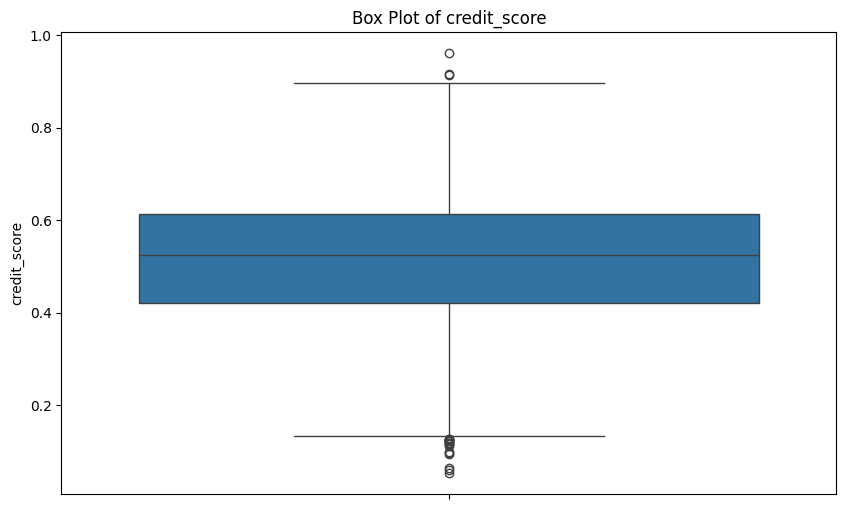

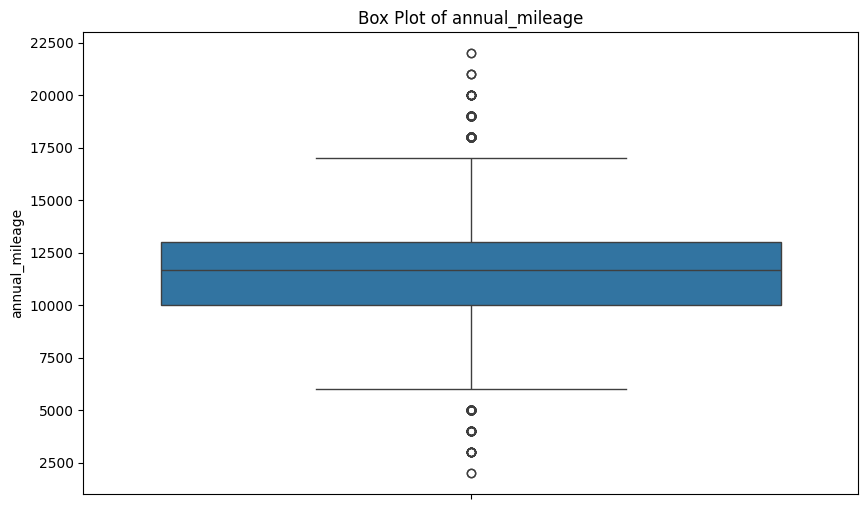

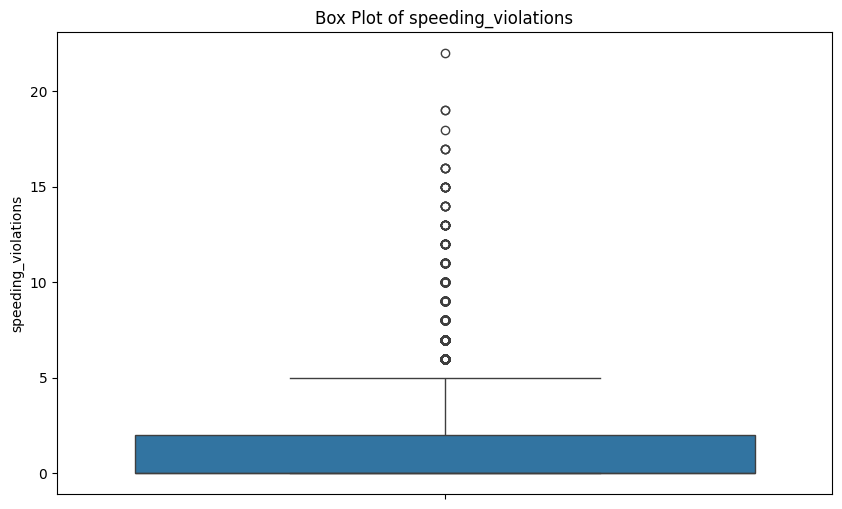

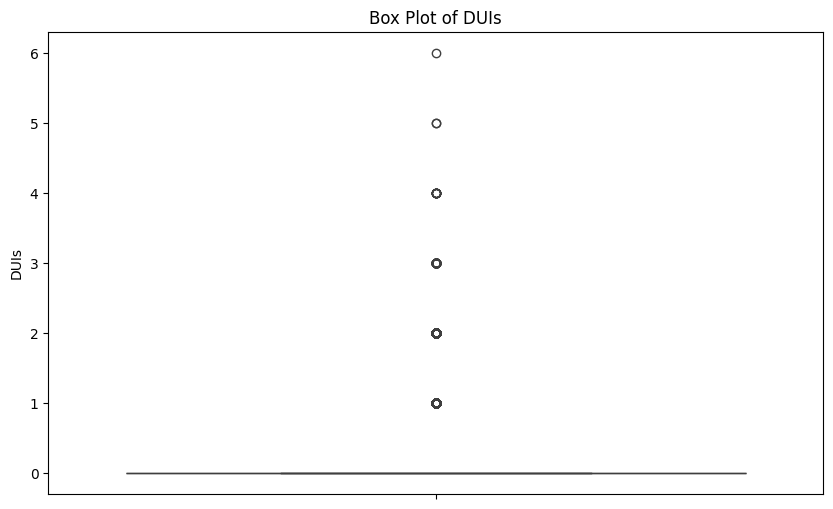

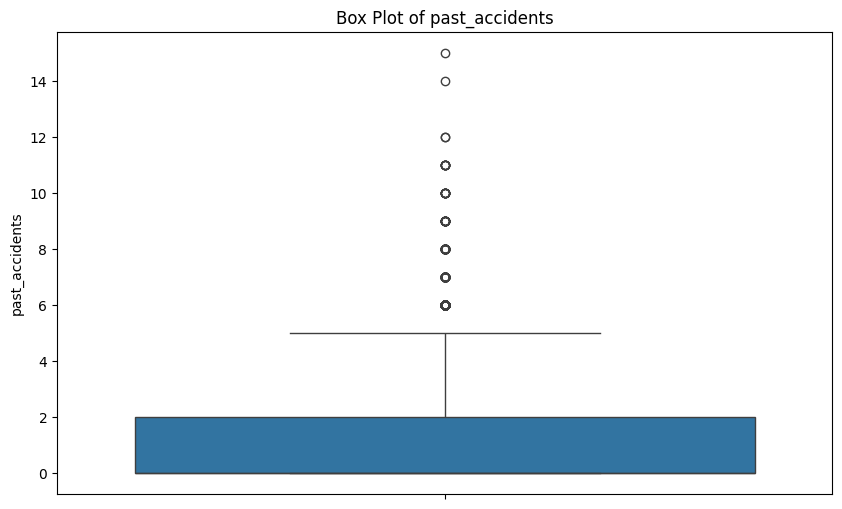

In [ ]:
numeric_cols = [ 'credit_score', 'annual_mileage', 'speeding_violations', 'DUIs', 'past_accidents']

# Plotting box plots for all relevant numeric values
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [ ]:

annual_mileage_col = 'annual_mileage'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[annual_mileage_col].quantile(0.25)
Q3 = df[annual_mileage_col].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the rows with outliers
outliers = df[(df[annual_mileage_col] < lower_bound) | (df[annual_mileage_col] > upper_bound)]

print("The lower bound bound is",lower_bound)

# Display the outliers
outliers.sort_values(by='annual_mileage', ascending=False)


The lower bound bound is 5500.0


,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,filled_claim
7339,26-39,male,majority,10-19y,none,working class,0.539990,False,before 2015,False,False,22000.0,sedan,0,0,0,True
7319,16-25,female,majority,0-9y,high school,middle class,0.552022,False,before 2015,False,False,22000.0,sedan,0,0,0,True
5153,16-25,male,majority,0-9y,none,poverty,0.481490,False,before 2015,False,False,21000.0,sedan,0,0,0,True
7548,16-25,male,majority,0-9y,university,poverty,0.332214,False,before 2015,False,False,21000.0,sedan,0,0,0,True
4401,40-64,male,majority,10-19y,university,upper class,0.815511,True,before 2015,False,False,21000.0,sedan,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3712,16-25,female,majority,0-9y,none,poverty,0.494878,False,before 2015,True,True,3000.0,sedan,0,0,0,True
1593,26-39,female,minority,0-9y,high school,upper class,0.633158,True,before 2015,True,True,3000.0,sedan,0,0,0,True
9089,65+,female,majority,0-9y,university,upper class,0.560541,True,before 2015,True,True,3000.0,sedan,0,0,0,True
2607,65+,male,majority,30y+,university,upper class,0.651709,True,after 2015,True,True,2000.0,sedan,12,0,1,False


In [ ]:
from scipy.stats import percentileofscore

value = upper_bound
quantile = percentileofscore(df['annual_mileage'], value)
print(f"The quantile for the value {value} in annual_mileage is: {quantile}%, which means that {100 - quantile}% of the rows are above the upper threshold of {value}.")

The quantile for the value 17500.0 in annual_mileage is: 98.31%, which means that 1.6899999999999977% of the rows are above the upper threshold of 17500.0.


In [ ]:
lower_bound

5500.0

In [ ]:

annual_mileage_col = 'speeding_violations'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[annual_mileage_col].quantile(0.25)
Q3 = df[annual_mileage_col].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the rows with outliers
outliers = df[(df[annual_mileage_col] < lower_bound) | (df[annual_mileage_col] > upper_bound)]


# Display the outliers
outliers.sort_values(by='speeding_violations', ascending=False)

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,filled_claim
9416,65+,male,majority,30y+,university,middle class,0.518765,True,before 2015,False,True,16000.0,sedan,6,1,3,False
7922,65+,male,majority,30y+,university,upper class,0.600701,True,after 2015,False,True,16000.0,sedan,7,1,3,False
493,65+,male,majority,30y+,university,upper class,0.406325,True,before 2015,False,True,16000.0,sedan,6,1,1,False
318,65+,male,majority,30y+,none,middle class,0.344958,True,before 2015,False,True,15000.0,sedan,7,0,0,False
7420,65+,female,majority,30y+,university,upper class,0.705310,True,before 2015,True,True,15000.0,sedan,6,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,65+,female,majority,20-29y,high school,upper class,0.449297,True,after 2015,True,True,3000.0,sedan,8,0,2,False
5015,65+,male,majority,30y+,university,upper class,0.659756,True,before 2015,True,True,3000.0,sedan,14,0,3,False
1607,65+,female,majority,30y+,university,upper class,0.613827,True,before 2015,True,True,3000.0,sedan,10,0,3,False
4775,40-64,male,majority,20-29y,university,poverty,0.450470,False,before 2015,True,True,3000.0,sedan,8,1,3,False


In [ ]:
from scipy.stats import percentileofscore

value = upper_bound
#This code calculates the percentile of a specific value (`value`) within the column `annual_mileage`.
quantile = percentileofscore(df['speeding_violations'], value)
print(f"The quantile for the value {value} in speeding violations is: {quantile}%, which means that {100 - quantile}% of the rows are above the upper threshold of {value}.")

The quantile for the value 5.0 in speeding violations is: 92.53%, which means that 7.469999999999999% of the rows are above the upper threshold of 5.0.


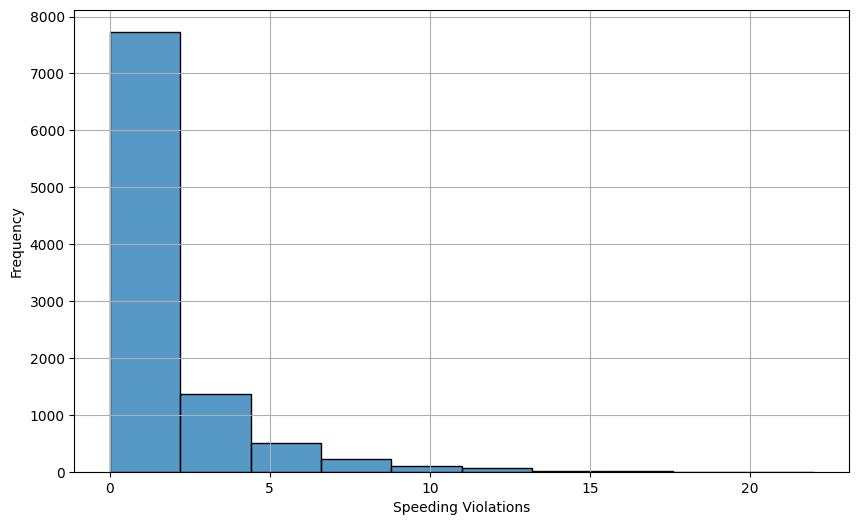

count    10000.000000
mean         1.482900
std          2.241966
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         22.000000
Name: speeding_violations, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['speeding_violations'], bins=10)
plt.xlabel('Speeding Violations')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(df['speeding_violations'].describe())
# Displaying the data of the 'speeding_violations' column



# Analyzing the data

With our cleansed dataset we can go ahead and begin the task of exploring the data. While several different analyses exist for EDA, we can group them under three large umbrellas; univariate analysis, bivariate analysis, and multivariate analysis. We will look at each one of these in turn.


# Univariate analysis

Univariate analysis is the simplest form of analyzing data. As the name implies, it deals with analyzing data within a single column or variable and is mostly used to describe data. There are different kinds of univariate analyses.



In [ ]:
value_counts = df["filled_claim"].value_counts()
percentage = df["filled_claim"].value_counts(normalize=True) * 100

# Combine both into a single DataFrame
value_counts_df = pd.DataFrame({'Count': value_counts, 'Percentage (%)': percentage})

# Display the result
print(value_counts_df)

              Count  Percentage (%)
filled_claim                       
False          6867           68.67
True           3133           31.33


Categorical unordered: This type of data has no order or ranking, and is categorical as opposed to numerical. Our “gender” column contains two sub-categories *that* describe whether a client is male or female. We can get a count of each category by using the value_counts() method.

In [ ]:
#Check the count for each category in the "gender" column
df["gender"].value_counts()

,count
gender,
female,5010
male,4990


Better yet, we can visualize this information using a countplot from Seaborn.



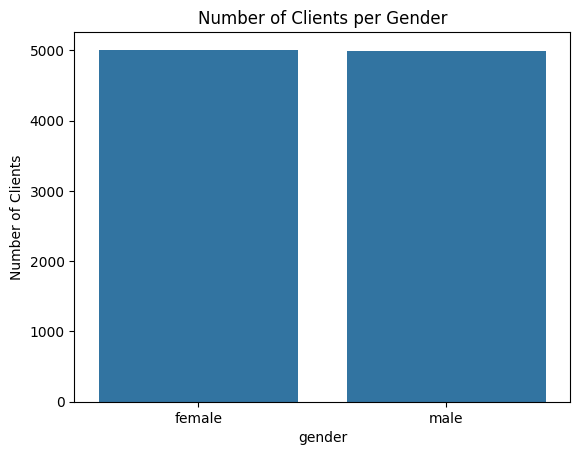

In [ ]:
#Create a countplot to visualize the count of each category in the gender column.
sns.countplot(data=df,x="gender")
plt.title("Number of Clients per Gender")
plt.ylabel("Number of Clients")
plt.show()

Categorical ordered: This type of data has a natural rank and progression. Examples from our dataset include “education” and “income”. Let’s explore the income variable using a pie chart.

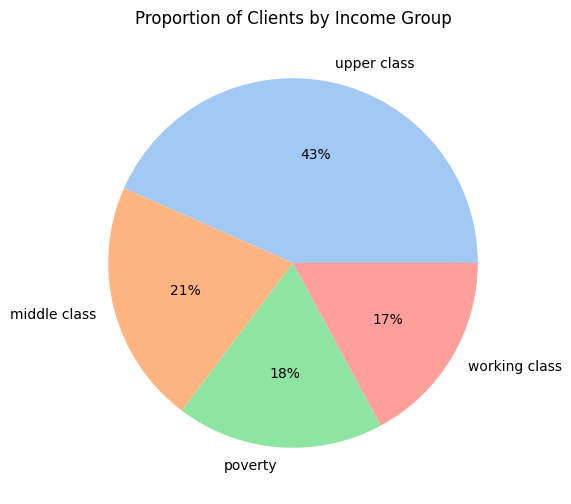

In [ ]:
#Define plot size
plt.figure(figsize=[6,6])

#Define column to use
data = df["income"].value_counts(normalize=True)
column_names = df.income.unique()

#Define labels
labels = ["upper class","middle class","poverty","working class"]

#Define color palette
colors = sns.color_palette('pastel')

#Create pie chart
plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')  ###The autopct parameter in the plt.pie function is used to format the numeric labels displayed on the pie chart slices. Specifically, it determines how the percentage of each slice is displayed. The value you pass to autopct is a format string, which controls the appearance of these percentage labels.
plt.title("Proportion of Clients by Income Group")
plt.show()

The largest category is “upper class”, representing 43% of the total, followed by “middle class” (21%), poverty (18%), and “working class” (17%). Now let’s explore the “education” variable using a countplot.

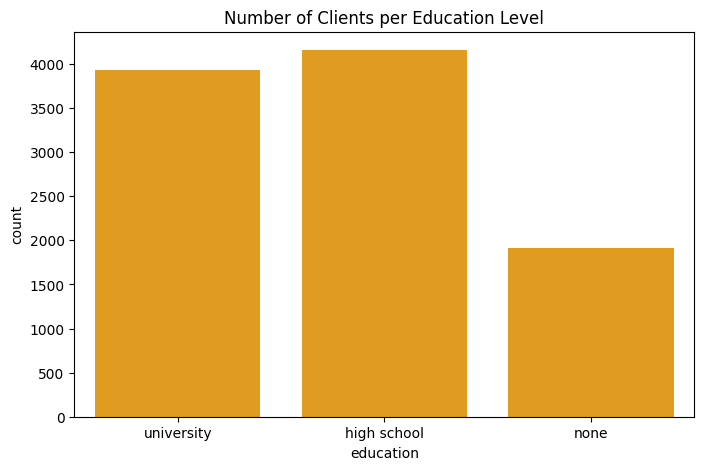

In [ ]:
#Create a countplot to visualize the count of each category in the education column
plt.figure(figsize=[8,5])
sns.countplot(data=df,x="education",order=["university","high school","none"],color="orange")
plt.title("Number of Clients per Education Level")
plt.show()

There are more clients with a high school education than any other category, followed by university graduates and then clients with no education.

Numeric: The third type of univariate analysis uses numerical data. Univariate numeric data is usually analyzed by calculating functions like the mean, mode, max, min, standard deviation etc. One easy way to get these summary statistics on a numerical column is by using the describe() method. Let’s try this on the “credit_score” column.

In [ ]:
#Return summary statistics for the "credit_score" column
df["credit_score"].describe()

count    10000.000000
mean         0.515247
std          0.134628
min          0.053358
25%          0.421301
50%          0.523659
75%          0.613827
max          0.960819
Name: credit_score, dtype: float64

This is great information, but it doesn’t tell us how the data is distributed. A histogram is a great way to visualize the frequency distribution of numerical data. We can plot one using the histplot() function in Seaborn.

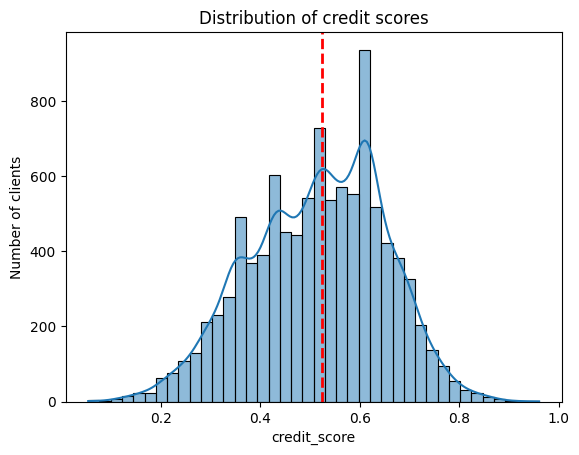

In [ ]:
#Plot a histogram using the "credit_score" column
sns.histplot(data=df,x="credit_score",bins=40,kde=True).set(title="Distribution of credit scores",ylabel="Number of clients")
median_credit_score = df['credit_score'].median()

# Add the median line
plt.axvline(median_credit_score, color='red', linestyle='dashed', linewidth=2)
plt.show()

The “credit_score” column follows a normal distribution or bell curve. Let’s create another histogram for the “annual_mileage” column, but this time we will include a kernel density estimation (kde) to show smoothness or continuity.

In [ ]:
#Return summary statistics for the "credit_score" column
df["annual_mileage"].describe()

count    10000.000000
mean     11697.003207
std       2680.167384
min       2000.000000
25%      10000.000000
50%      11697.003207
75%      13000.000000
max      22000.000000
Name: annual_mileage, dtype: float64

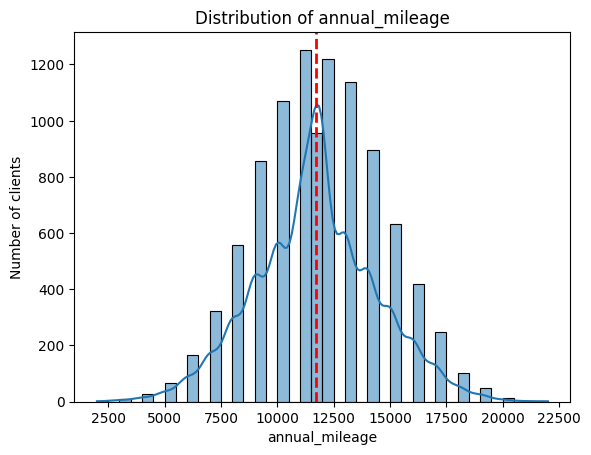

In [ ]:
#Plot a histogram using the "credit_score" column
sns.histplot(data=df,x="annual_mileage",bins=40,kde=True).set(title="Distribution of annual_mileage",ylabel="Number of clients")
median_annual_mileage = df['annual_mileage'].median()

# Add the median line
plt.axvline(median_annual_mileage, color='red', linestyle='dashed', linewidth=2)
plt.show()

let's add speeding_violations

In [ ]:
df["speeding_violations"].describe()

count    10000.000000
mean         1.482900
std          2.241966
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         22.000000
Name: speeding_violations, dtype: float64

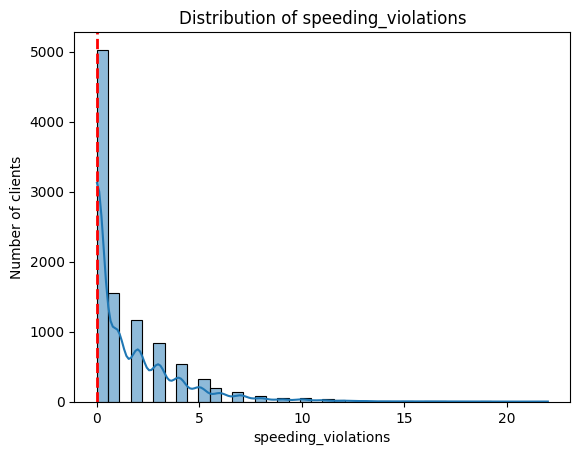

In [ ]:
#Plot a histogram using the "credit_score" column
sns.histplot(data=df,x="speeding_violations",bins=40,kde=True).set(title="Distribution of speeding_violations",ylabel="Number of clients")
median_annual_mileage = df['speeding_violations'].median()

# Add the median line
plt.axvline(median_annual_mileage, color='red', linestyle='dashed', linewidth=2)
plt.show()


# Bivariate analysis

```
```



Bivariate analysis involves analyzing data with two variables or columns. This is usually a way to explore the relationships between these variables and how they influence each other, if at all. A bivariate analysis could take one of three different forms: numeric-numeric, numeric-categorical and categorical-categorical.

Numeric-Numeric: Scatter plots are a common way to compare two numeric variables. Let’s investigate the relationship between “annual_mileage” and “speeding_violations”.

Another bell curve, confirming that data near the mean are more frequent in occurrence than data far from the mean.



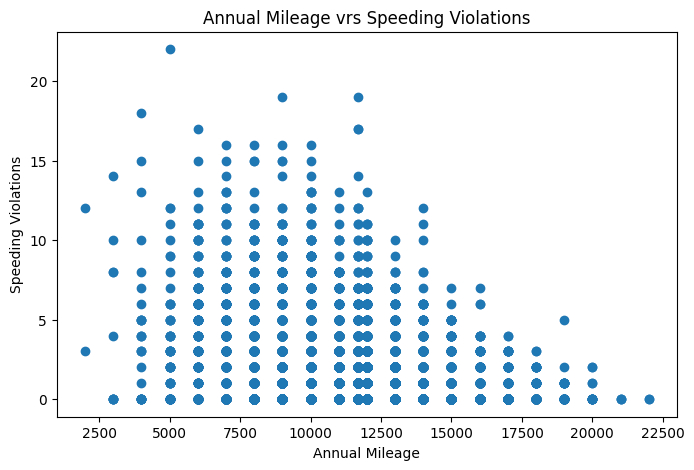

In [ ]:
#Create a scatter plot to. show relationship between "annual_mileage" and "speeding_violations"
plt.figure(figsize=[8,5])
plt.scatter(data=df,x="annual_mileage",y="speeding_violations")
plt.title("Annual Mileage vrs Speeding Violations")
plt.ylabel("Speeding Violations")
plt.xlabel("Annual Mileage")
plt.show()


In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

pearson_corr, _ = pearsonr(df['annual_mileage'], df['speeding_violations'])
spearman_corr, _ = spearmanr(df['annual_mileage'], df['speeding_violations'])

print(f"Pearson Correlation: {pearson_corr}")
print(f"Spearman Correlation: {spearman_corr}")

Pearson Correlation: -0.30812515118163186
Spearman Correlation: -0.2876065890424038


From the graph, we can see a negative correlation between annual mileage and the number of speeding violations. This means the more miles a client drives per year, the fewer speeding violations they commit.



 **speeding_violations VS *past_accidents***

<Figure size 2000x1200 with 0 Axes>

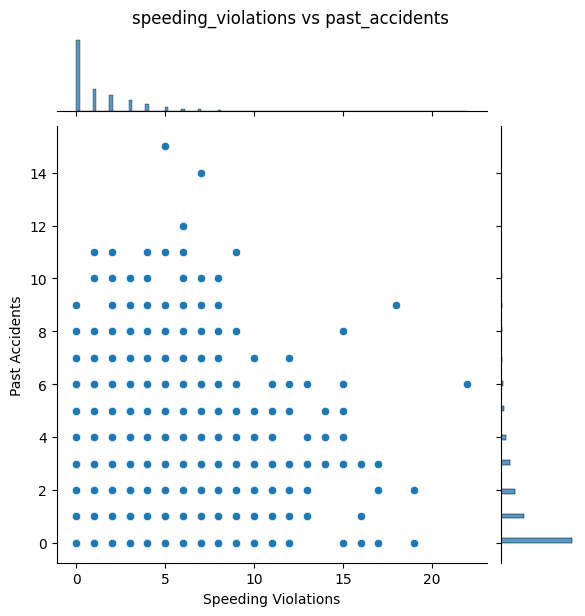

In [ ]:
plt.figure(figsize=[20, 12])

sns.jointplot(data=df,x="speeding_violations",y="past_accidents")
plt.suptitle("speeding_violations vs past_accidents", y=1.02)
plt.xlabel("Speeding Violations")
plt.ylabel("Past Accidents")
plt.show()


In [ ]:
pearson_corr, _ = pearsonr(df['past_accidents'], df['speeding_violations'])
spearman_corr, _ = spearmanr(df['past_accidents'], df['speeding_violations'])

print(f"Pearson Correlation: {pearson_corr}")
print(f"Spearman Correlation: {spearman_corr}")

Pearson Correlation: 0.4430742318224514
Spearman Correlation: 0.5701223841449278


Numeric-Categorical: Here, we analyze data using one set of numeric variables and another set of categorical variables. Analysis can be done by using the mean and median as in the example below. We first group by "filled_claim" and then calculate the mean “annual_mileage” for each group.

 **filled_claim VS annual_mileage**

In [ ]:
#Check the mean annual mileage per category in the filled_claim column
df.groupby('filled_claim')['annual_mileage'].mean()

filled_claim
False    11375.549735
True     12401.574221
Name: annual_mileage, dtype: float64

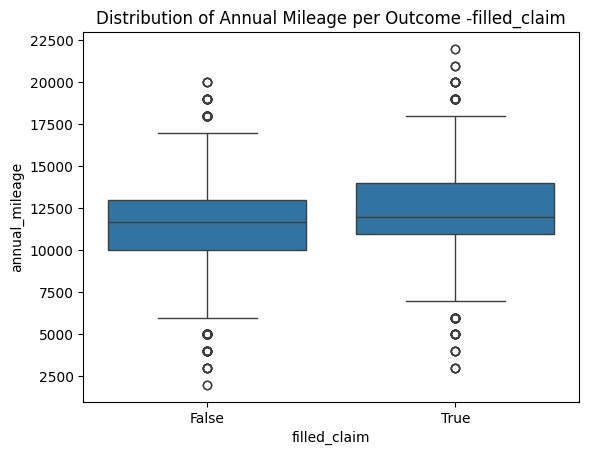

In [ ]:
#Plot two boxplots to compare dispersion
sns.boxplot(data=df,x='filled_claim', y='annual_mileage')
plt.title("Distribution of Annual Mileage per Outcome -filled_claim")
plt.show()

Both variables have similar medians (denoted by the middle line that runs through the box) though clients who made a claim have slightly higher median annual mileage than clients who didn’t. The same can be said for the first and third quartiles (denoted by the lower and upper borders of the box respectively).



 **filled_claim VS past_accidents**

In [ ]:
df.groupby('filled_claim')['past_accidents'].mean()

filled_claim
False    1.403961
True     0.294287
Name: past_accidents, dtype: float64

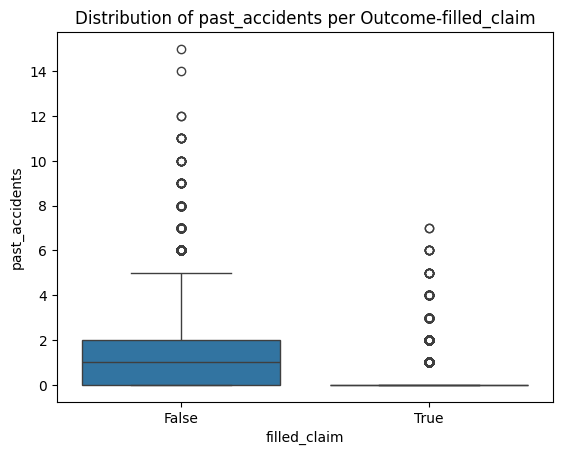

In [ ]:
#Plot two boxplots to compare dispersion
sns.boxplot(data=df,x='filled_claim', y='past_accidents')
plt.title("Distribution of past_accidents per Outcome-filled_claim")
plt.show()

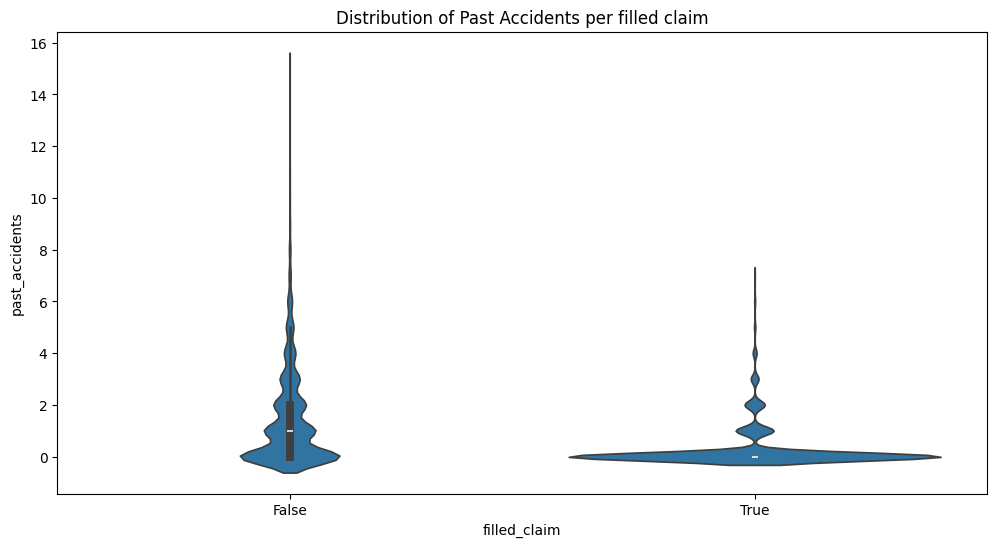

In [ ]:


# Ensure 'past_accidents' column is of integer type
df['past_accidents'] = df['past_accidents'].astype(int)

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='filled_claim', y='past_accidents')
plt.title("Distribution of Past Accidents per filled claim")
plt.show()


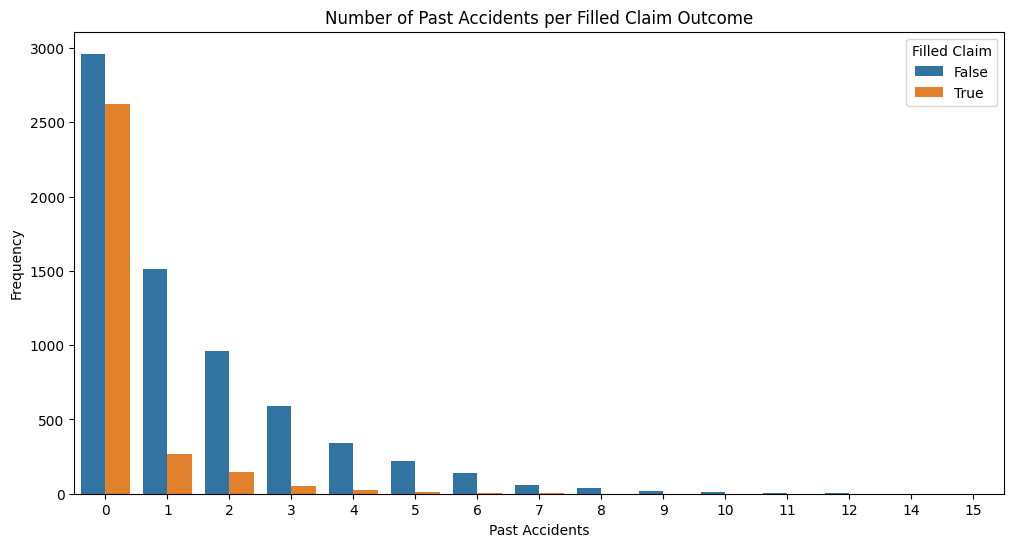

In [ ]:
df['past_accidents'] = df['past_accidents'].astype(int)

# Create a grouped bar plot for past_accidents per filled_claim
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='past_accidents', hue='filled_claim')
plt.title("Number of Past Accidents per Filled Claim Outcome")
plt.xlabel("Past Accidents")
plt.ylabel("Frequency")
plt.legend(title='Filled Claim')
plt.show()

Having more accidents in the past is an indicator of not filling a claim. We have already observed a positive correlation between mileage and filing a claim. Therefore, let's examine the relationship between mileage and past accidents

In [ ]:
pearson_corr, _ = pearsonr(df['past_accidents'], df['annual_mileage'])
spearman_corr, _ = spearmanr(df['past_accidents'], df['annual_mileage'])

print(f"Pearson Correlation: {pearson_corr}")
print(f"Spearman Correlation: {spearman_corr}")

Pearson Correlation: -0.18718030631904647
Spearman Correlation: -0.17655787693750627


***filled_claim and credit score***

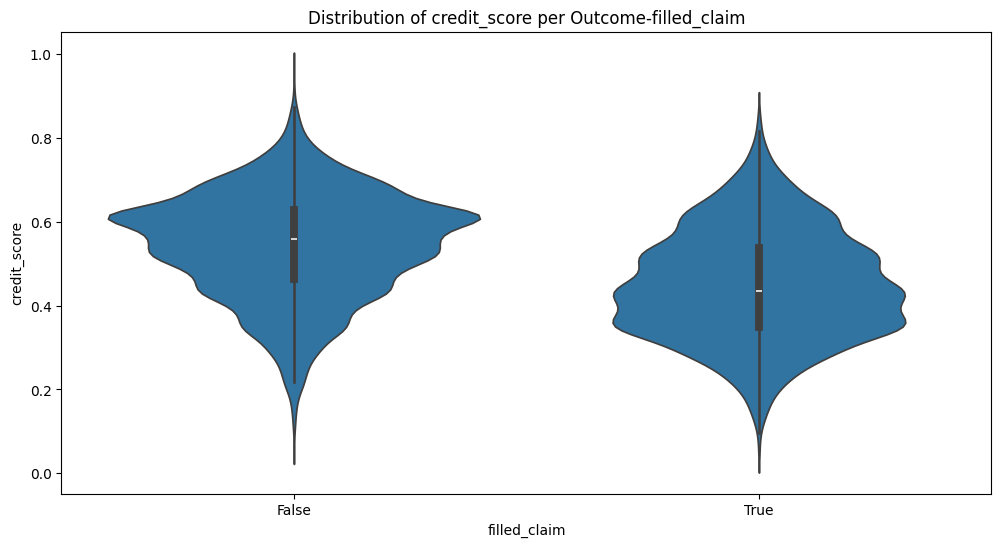

In [ ]:

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='filled_claim', y='credit_score')
plt.title("Distribution of credit_score per Outcome-filled_claim")
plt.show()


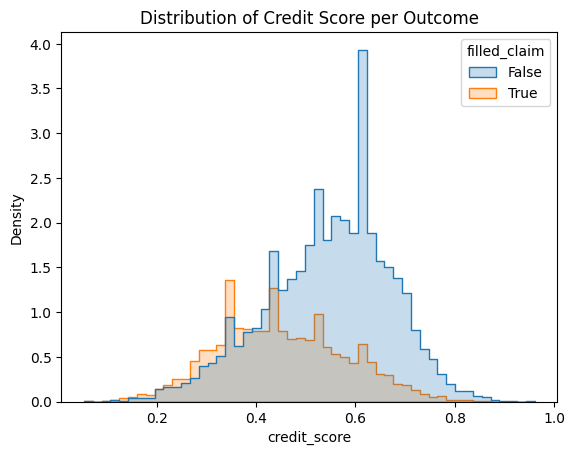

In [ ]:
#Create histograms to compare distribution
#use of a bivariate histogram by setting the “hue” argument in the histplot() function to “outcome”.
sns.histplot(df,x="credit_score",hue="filled_claim",element="step",stat="density")
plt.title("Distribution of Credit Score per Outcome")
plt.show()

**Claim rate  and age**

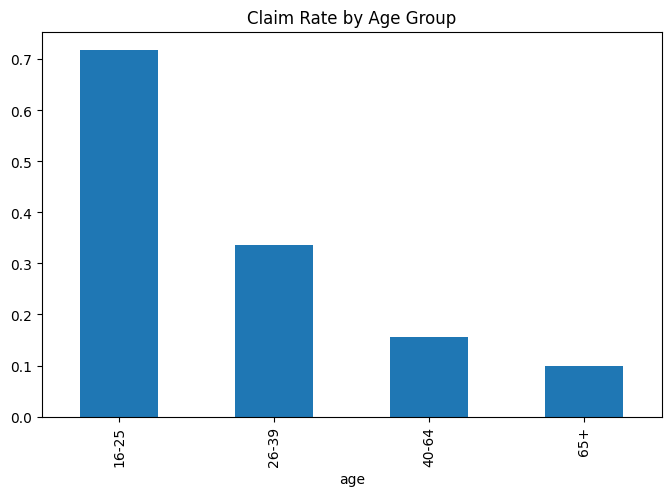

In [ ]:
#Plot the average claim rate per age group
df['claim_rate'] = np.where(df['filled_claim']==True,1,0)

plt.figure(figsize=[8,5])
df.groupby('age')['filled_claim'].mean().plot(kind="bar")
plt.title("Claim Rate by Age Group")
plt.show()

**Age and driving_experience**

Categorical variable and Categorical variable

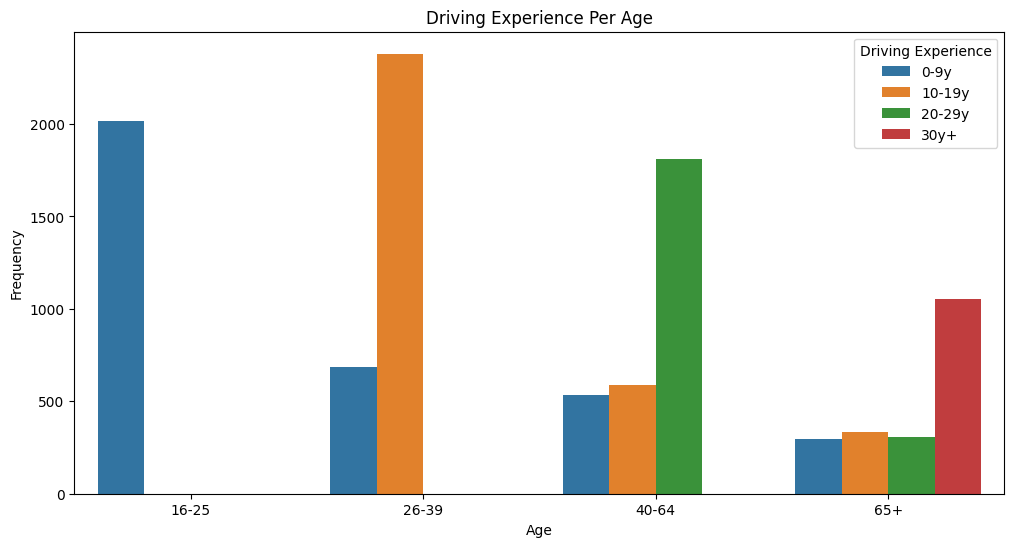

In [ ]:

# Convert the 'age' column to an ordered categorical type
age_order = sorted(df['age'].unique())
df['age'] = pd.Categorical(df['age'], categories=age_order, ordered=True)

# Create a grouped bar plot for past_accidents per filled_claim
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='age', hue='driving_experience')
plt.title("Driving Experience Per Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(title='Driving Experience')
plt.show()


In [ ]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,id,credit_score,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents,claim_rate
id,1.000000,0.000929,0.006038,-0.002111,0.008156,0.009268,0.001831,-0.010506
credit_score,0.000929,1.000000,0.007733,-0.171065,0.212907,0.131418,0.185134,-0.332557
postal_code,0.006038,0.007733,1.000000,-0.127286,0.113686,0.038492,-0.116985,0.095889
annual_mileage,-0.002111,-0.171065,-0.127286,1.000000,-0.308125,-0.111232,-0.187180,0.177575
speeding_violations,0.008156,0.212907,0.113686,-0.308125,1.000000,0.359838,0.443074,-0.291862
DUIs,0.009268,0.131418,0.038492,-0.111232,0.359838,1.000000,0.259359,-0.189352
past_accidents,0.001831,0.185134,-0.116985,-0.187180,0.443074,0.259359,1.000000,-0.311495
claim_rate,-0.010506,-0.332557,0.095889,0.177575,-0.291862,-0.189352,-0.311495,1.000000


# Multivariate analysis


This comprises data analysis involving more than two variables. A common type of multivariate analysis is the heatmap. Heatmaps provide a fast and simple way for visual recognition of patterns and trends. We can easily check the relationship between variables in our data set like “education” and “income” by using a third variable, claim rate. First, we will create a pivot table.



In [ ]:
df.tail(1)

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,...,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,filled_claim,outcome,claim_rate
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,True,before 2015,...,True,10238,13000.0,sedan,0,0,0,False,False,0


In [ ]:
#Create a pivot table for education and income with average claim rate as values
edu_income = pd.pivot_table(data=df,index='education',columns='income',values='claim_rate',aggfunc='mean')
edu_income


income,middle class,poverty,upper class,working class
education,,,,
high school,0.255396,0.671662,0.118347,0.450736
none,0.209790,0.640895,0.098592,0.394841
university,0.335135,0.649485,0.143167,0.550769


We can then pass in our pivot table to the heatmap() function in Seaborn.



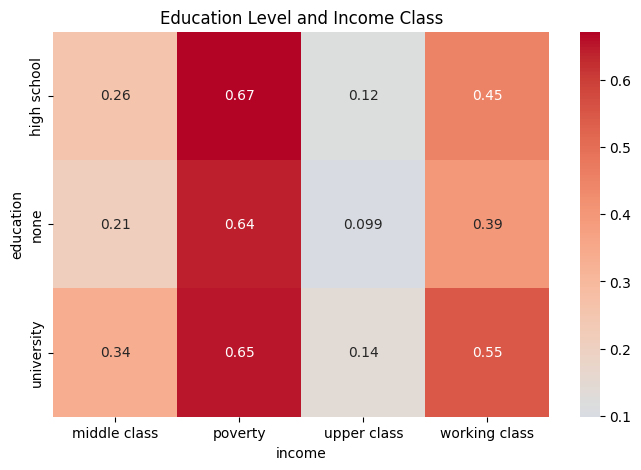

In [ ]:
#Create a heatmap to visualize income, education and claim rate
plt.figure(figsize=[8,5])
sns.heatmap(edu_income,annot=True,cmap='coolwarm',center=0.117)
plt.title("Education Level and Income Class")
plt.show()

In [ ]:
edu_income.tail(211)

income,middle class,poverty,upper class,working class
education,,,,
high school,0.255396,0.671662,0.118347,0.450736
none,0.209790,0.640895,0.098592,0.394841
university,0.335135,0.649485,0.143167,0.550769


In [ ]:
df.tail(1)

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,filled_claim,claim_rate
9999,26-39,female,majority,0-9y,none,working class,0.435225,True,before 2015,True,True,13000.0,sedan,0,0,0,False,0


**📊 Pairplot for Multivariate Relationships**

This code creates a scatter matrix (`sns.pairplot`) of all numeric columns in the DataFrame `df`,  
coloring the points based on the `'driving_experience'` category.  
The matrix helps identify pairwise relationships and group differences.

- `hue='driving_experience'` – adds color coding by category  
- `suptitle()` – adds a title slightly above the plot


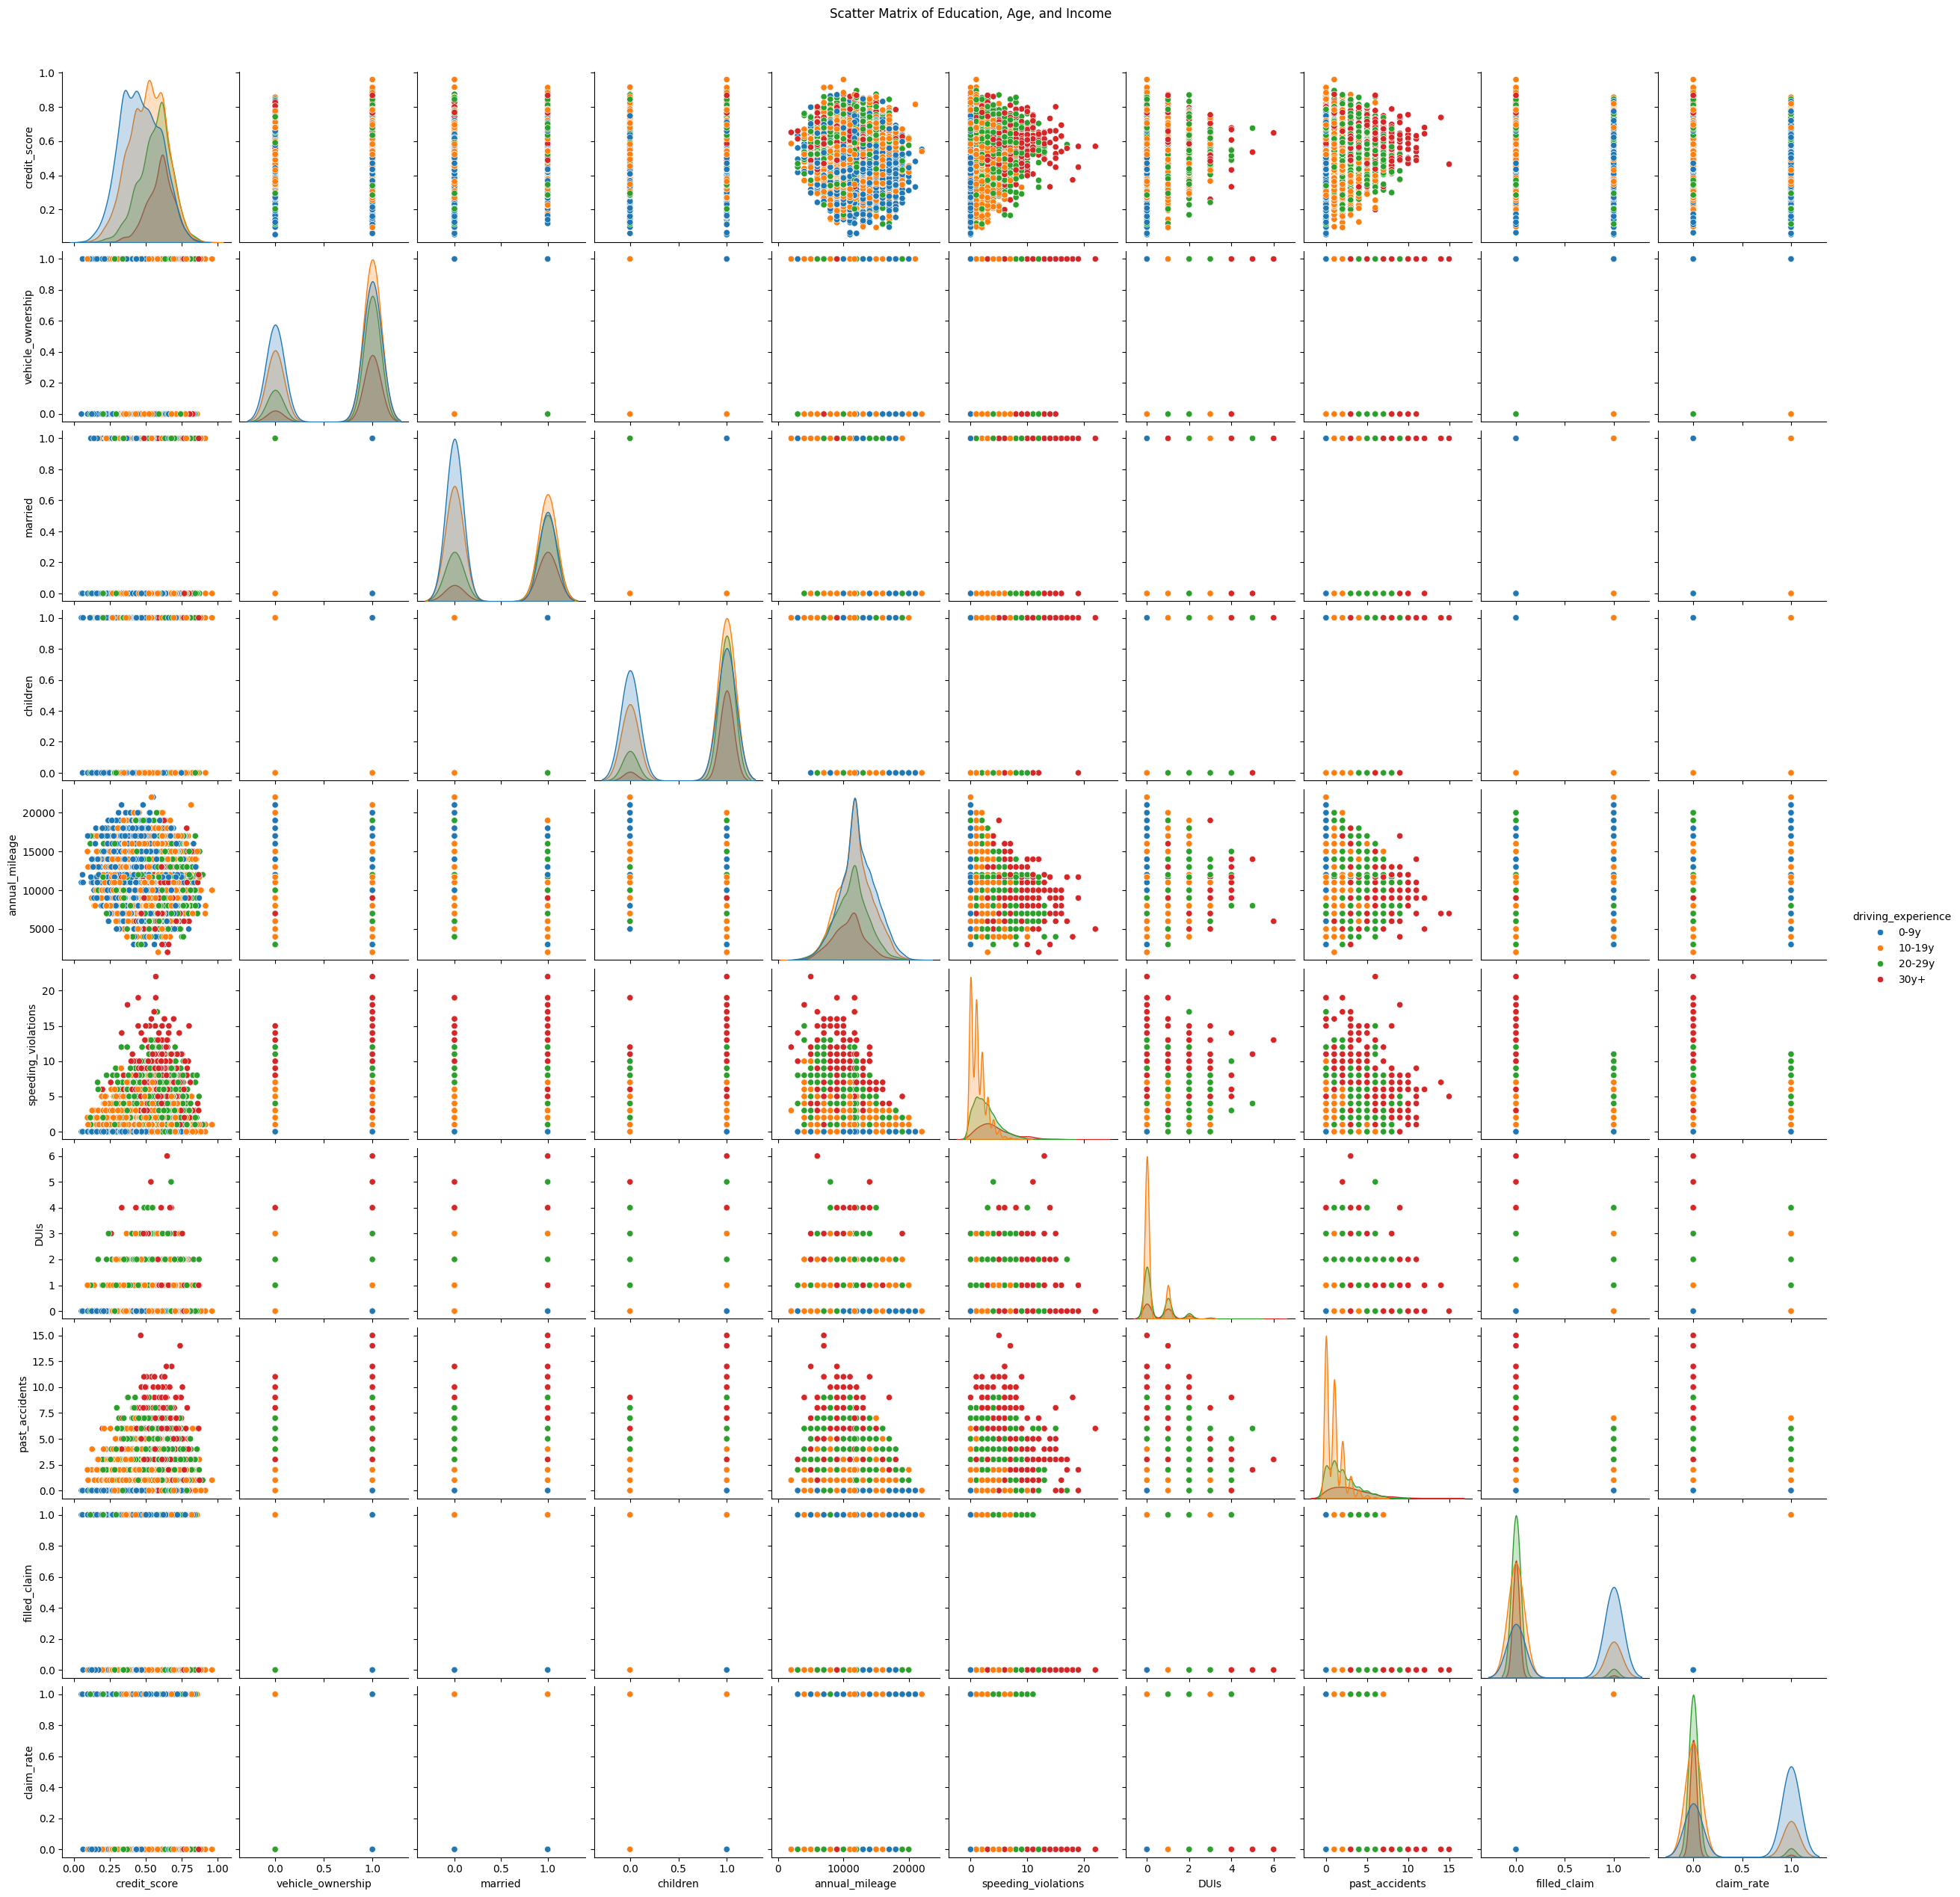

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

edu_income2=edu_income.reset_index()


# --- Generate the Scatter Matrix Plot ---
# This version removes the `hue` and `palette` arguments to avoid the error.
g = sns.pairplot(df,hue='driving_experience')

# --- Add a Title and Show the Plot ---
g.fig.suptitle("Scatter Matrix of Education, Age, and Income", y=1.02) # y=1.02 raises title
plt.show()

High school graduates in the poverty income class have the highest claim rate, followed by university graduates in the poverty income class. Clients in the upper class income category with no education have the lowest claim rates.

Let’s do the same for driving experience and marital status

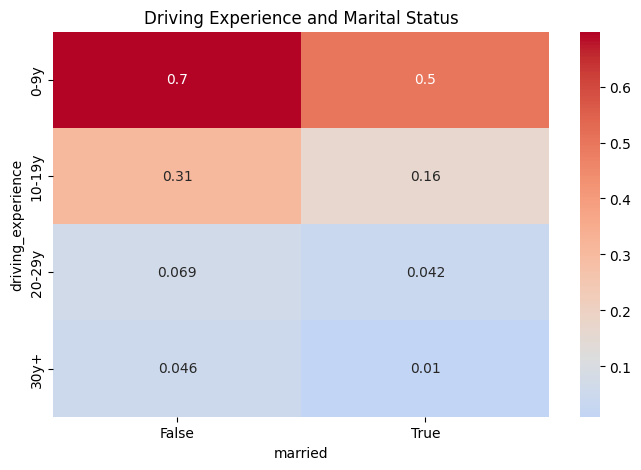

In [ ]:
#Create pivot table for driving experience and marital status with average claim rate as values
driv_married = pd.pivot_table(data=df,index='driving_experience',columns='married',values='claim_rate')

#Create a heatmap to visualize driving experience, marital status and claim rate
plt.figure(figsize=[8,5])
sns.heatmap(driv_married,annot=True,cmap='coolwarm', center=0.117)
plt.title("Driving Experience and Marital Status")
plt.show()

Unmarried individuals with 0–9 years of driving experience are the most likely to file a claim, while married individuals with 30+ years of driving experience are the least likely to file a claim.

 let’s create a heatmap to visualize gender, family status, and claim rate.

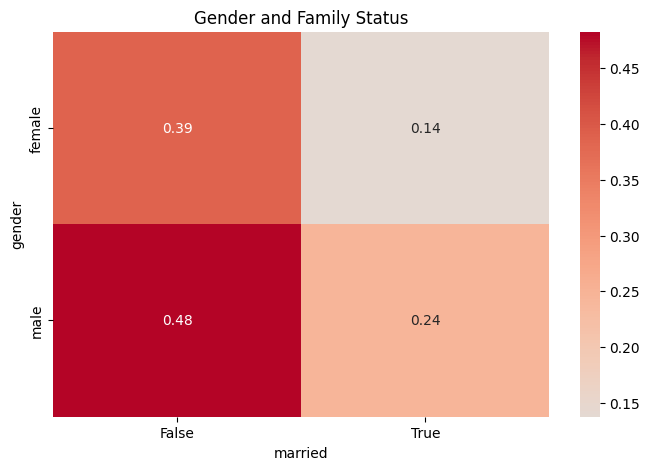

In [ ]:
#Create pivot table for gender and family status with average claim rate as values
gender_children = pd.pivot_table(data=df,index='gender',columns='married',values='claim_rate')

#Create a heatmap to visualize gender, family status and claim rate
plt.figure(figsize=[8,5])
sns.heatmap(gender_children,annot=True,cmap='coolwarm', center=0.117)
plt.title("Gender and Family Status")
plt.show()

**Annual Mileage per filled_claim and Age**

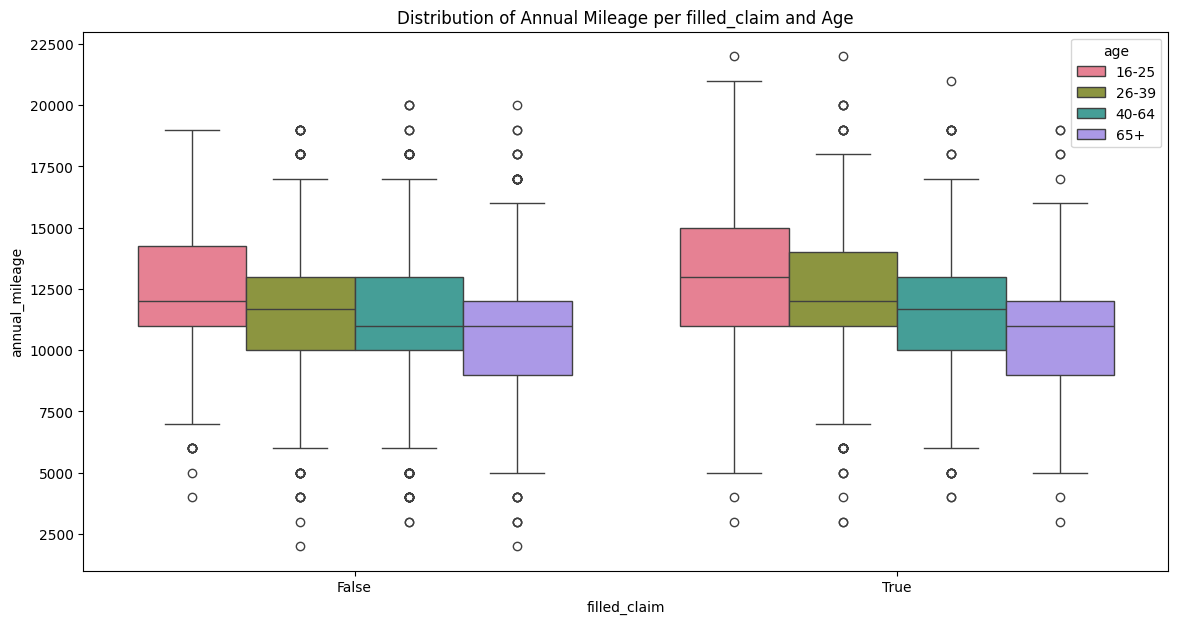

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
age_order = sorted(df['age'].unique())##['16-25', '26-39', '40-64', '65+']

# Asage_order = sorted(df['age'].unique())
palette = sns.color_palette("husl", len(age_order))
sns.boxplot(data=df, x='filled_claim', y='annual_mileage', hue='age',palette=palette, hue_order=age_order)
plt.title("Distribution of Annual Mileage per filled_claim and Age")
plt.show()

In [ ]:
medians = []

for age in age_order:
    for filled_claim in df['filled_claim'].unique():
        data = df[(df['filled_claim'] == filled_claim) & (df['age'] == age)]['annual_mileage']
        if not data.empty:
            median_val = data.median()
        else:
            median_val = None
        medians.append({'filled_claim': filled_claim, 'age': age, 'median_annual_mileage': median_val})

medians_df = pd.DataFrame(medians)


print(medians_df)

   filled_claim    age  median_annual_mileage
0         False  16-25           12000.000000
1          True  16-25           13000.000000
2         False  26-39           11697.003207
3          True  26-39           12000.000000
4         False  40-64           11000.000000
5          True  40-64           11697.003207
6         False    65+           11000.000000
7          True    65+           11000.000000


 We saw clients who made a claim have slightly higher median annual mileage than clients who didn’t. Now we see that the pattern isn't kept across different age ranges

In [ ]:
value_counts = df["age"].value_counts()
percentage = df["age"].value_counts(normalize=True) * 100

# Combine both into a single DataFrame
value_counts_df = pd.DataFrame({'Count': value_counts, 'Percentage (%)': percentage})

# Display the result
print(value_counts_df)

       Count  Percentage (%)
age                         
26-39   3063           30.63
40-64   2931           29.31
16-25   2016           20.16
65+     1990           19.90


** **

**Adding gender as a breakdown**

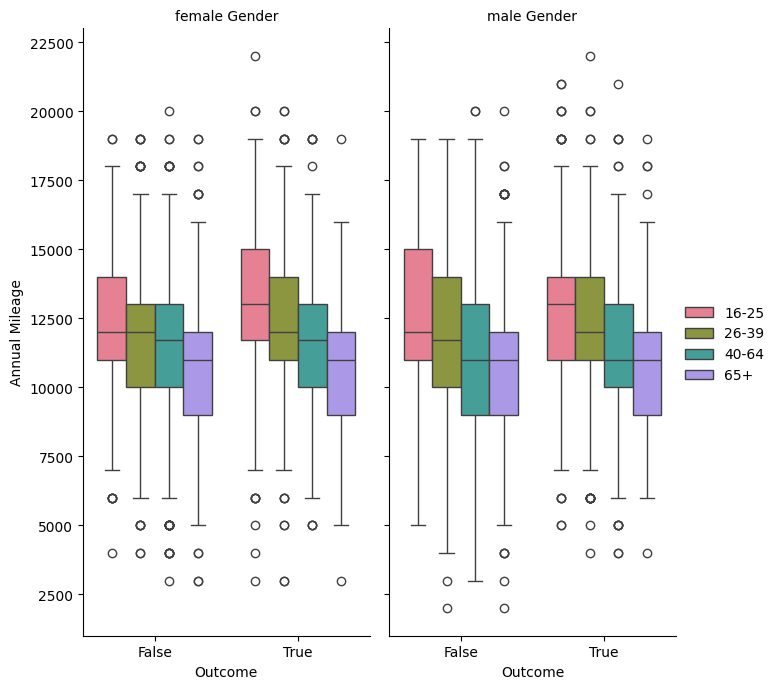

In [ ]:


# Extract the default Seaborn color palette
default_palette = sns.color_palette()
# Ensure consistent colors for each age group
age_order = sorted(df['age'].unique())
palette = sns.color_palette("husl", len(age_order))

# Create a FacetGrid with the 'gender' column to create separate plots for each gender
g = sns.FacetGrid(df, col='gender', height=7, aspect=0.5)##Grid Layout: FacetGrid allows you to create a grid of plots based on the values of one or more categorical variables. Each subplot in the grid corresponds to a unique combination of these values.

# Use map to create the boxplots within the FacetGrid with the default palette
g.map_dataframe(sns.boxplot, x='filled_claim', y='annual_mileage', hue='age', palette=palette,hue_order=age_order)
#The map_dataframe method is a function in the seaborn library, specifically used with FacetGrid objects. It allows you to apply a plotting function to each subset of the data defined by the grid. This is particularly useful for creating complex, multi-faceted plots with minimal code.

# Add titles and adjust the layout
g.set_axis_labels('filled_claim', 'Annual Mileage')
g.set_titles(col_template='{col_name} Gender')
g.add_legend()

# Show the plot
plt.show()


**Adding income as a breakdown**

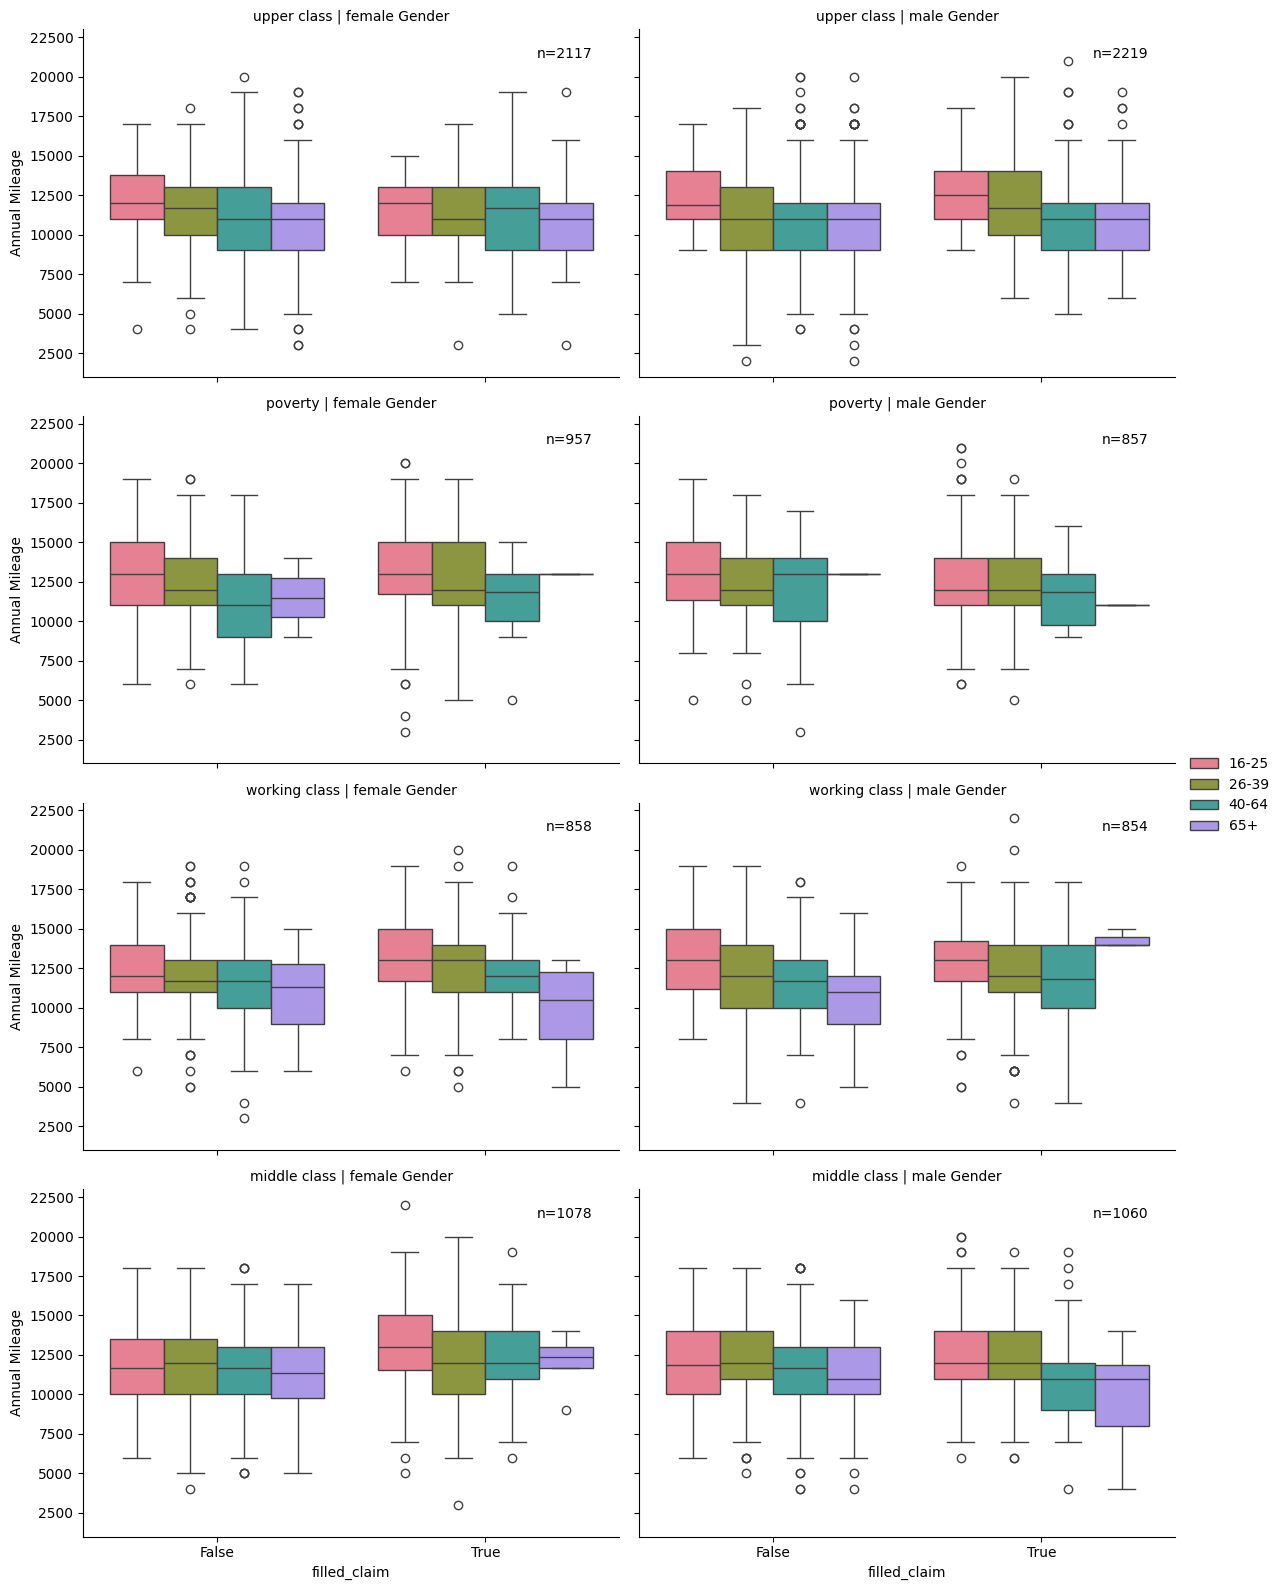

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Extract the default Seaborn color palette
default_palette = sns.color_palette()
# Ensure consistent colors for each age group
age_order = sorted(df['age'].unique())
palette = sns.color_palette("husl", len(age_order))

# Create a FacetGrid with the 'gender' column to create separate plots for each gender and income
g = sns.FacetGrid(df, col='gender', row='income', height=4, aspect=1.5)

# Function to add sample size text
def add_sample_size(data, **kwargs):
    ax = plt.gca()
    sample_size = len(data)
    ax.text(0.95, 0.95, f'n={sample_size}', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)

# Use map to create the boxplots within the FacetGrid with the default palette
g.map_dataframe(sns.boxplot, x='filled_claim', y='annual_mileage', hue='age', palette=palette, hue_order=age_order)
g.map_dataframe(add_sample_size)

# Add titles and adjust the layout
g.set_axis_labels('filled_claim', 'Annual Mileage')
g.set_titles(row_template='{row_name}', col_template='{col_name} Gender')
g.add_legend()

# Show the plot
plt.show()


# [](https://)

---



---



#Analzying Sales overtime data set





In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sales_data = pd.read_csv('/content/drive/MyDrive/Datasets/sales_overtime_data.csv')


NameError: name 'pd' is not defined

# Columns

- **Order ID:** Unique identifier for each sales order.
- **Date:** Date of the sales transaction.
- **Category:** Broad category of the product sold (e.g., Electronics, Home Appliances, Clothing, Books, Beauty Products, Sports).
- **Product Name:** Specific name or model of the product sold.
- **Quantity:** Number of units of the product sold in the transaction.
- **Unit Price:** Price of one unit of the product.
- **Total Price:** Total revenue generated from the sales transaction (Quantity * Unit Price).
- **Region:** Geographic region where the transaction occurred (e.g., North America, Europe, Asia).
- **Payment Method:** Method used for payment (e.g., Credit Card, PayPal, Debit Card).



In [ ]:
#Return number of rows and columns
sales_data.shape

(240, 9)

In [ ]:
sales_data.head(10)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
5,10006,2024-01-06,Sports,Wilson Evolution Basketball,5,29.99,149.95,Asia,Credit Card
6,10007,2024-01-07,Electronics,MacBook Pro 16-inch,1,2499.99,2499.99,North America,Credit Card
7,10008,2024-01-08,Home Appliances,Blueair Classic 480i,2,599.99,1199.98,Europe,PayPal
8,10009,2024-01-09,Clothing,Nike Air Force 1,6,89.99,539.94,Asia,Debit Card
9,10010,2024-01-10,Books,Dune by Frank Herbert,2,25.99,51.98,North America,Credit Card


In [ ]:
sales_data.tail(10)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
230,10231,2024-08-18,Clothing,Adidas Originals Trefoil Hoodie,4,64.99,259.96,Asia,Debit Card
231,10232,2024-08-19,Books,Dune by Frank Herbert,2,9.99,19.98,North America,Credit Card
232,10233,2024-08-20,Beauty Products,Fresh Sugar Lip Treatment,1,24.00,24.00,Europe,PayPal
233,10234,2024-08-21,Sports,Hydro Flask Standard Mouth Water Bottle,3,32.95,98.85,Asia,Credit Card
234,10235,2024-08-22,Electronics,Bose QuietComfort 35 II Wireless Headphones,1,299.00,299.00,North America,Credit Card
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal
239,10240,2024-08-27,Sports,Yeti Rambler 20 oz Tumbler,2,29.99,59.98,Asia,Credit Card


In [ ]:
sales_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [ ]:
sales_data.isnull().sum()


Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
Month_Number        0
Month               0
Week_Number         0
Week                0
dtype: int64

In [ ]:
# convert to date
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data['Date'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 240 entries, 0 to 239
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
240 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.0 KB


 Ensuring the completeness of the data

In [ ]:

unique_dates = sales_data['Date'].nunique()
print(f"Number of unique dates: {unique_dates}")

Number of unique dates: 240


In [ ]:
unique_dates = sales_data['Date'].unique()
print("Unique dates:")
for date in unique_dates:
    print(date)

Unique dates:
2024-01-01
2024-01-02
2024-01-03
2024-01-04
2024-01-05
2024-01-06
2024-01-07
2024-01-08
2024-01-09
2024-01-10
2024-01-11
2024-01-12
2024-01-13
2024-01-14
2024-01-15
2024-01-16
2024-01-17
2024-01-18
2024-01-19
2024-01-20
2024-01-21
2024-01-22
2024-01-23
2024-01-24
2024-01-25
2024-01-26
2024-01-27
2024-01-28
2024-01-29
2024-01-30
2024-01-31
2024-02-01
2024-02-02
2024-02-03
2024-02-04
2024-02-05
2024-02-06
2024-02-07
2024-02-08
2024-02-09
2024-02-10
2024-02-11
2024-02-12
2024-02-13
2024-02-14
2024-02-15
2024-02-16
2024-02-17
2024-02-18
2024-02-19
2024-02-20
2024-02-21
2024-02-22
2024-02-23
2024-02-24
2024-02-25
2024-02-26
2024-02-27
2024-02-28
2024-02-29
2024-03-01
2024-03-02
2024-03-03
2024-03-04
2024-03-05
2024-03-06
2024-03-07
2024-03-08
2024-03-09
2024-03-10
2024-03-11
2024-03-12
2024-03-13
2024-03-14
2024-03-15
2024-03-16
2024-03-17
2024-03-18
2024-03-19
2024-03-20
2024-03-21
2024-03-22
2024-03-23
2024-03-24
2024-03-25
2024-03-26
2024-03-27
2024-03-28
2024-03-29
2024-03

In [ ]:
##generating date range using min and max
full_date_range = pd.date_range(start=sales_data['Date'].min(), end=sales_data['Date'].max())##The deafult is days but we could change it using #freq='W'/'M'
full_date_range

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10',
               ...
               '2024-08-18', '2024-08-19', '2024-08-20', '2024-08-21',
               '2024-08-22', '2024-08-23', '2024-08-24', '2024-08-25',
               '2024-08-26', '2024-08-27'],
              dtype='datetime64[ns]', length=240, freq='D')

In [ ]:

# Generate the full date range

# Find the missing dates
missing_dates = full_date_range.difference(sales_data['Date'].drop_duplicates())
##The difference() method in the context of sets and Pandas is used to compute the difference between two sets of data. Specifically, it returns the elements that are present in the first set but not in the second set. When used with Pandas date ranges, it can help identify missing dates
if missing_dates.empty:
    print("No missing dates.")
else:
    print("Missing dates:")
    for date in missing_dates:
        print(date.date())


No missing dates.


Feature Engineering - Date fields

In [ ]:
# creating new column 'Month'
sales_data['Month_Number'] = sales_data['Date'].dt.month
sales_data['Month'] = sales_data['Date'].dt.to_period('M')


sales_data['Month'] = sales_data['Month'].apply(lambda x: x.to_timestamp())

# Now you can use pd.to_datetime() if needed
sales_data['Month'] = pd.to_datetime(sales_data['Month'])
sales_data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Month_Number,Month,Week_Number,Week
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,1,2024-01-01,1,2024-01-01
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,1,2024-01-01,1,2024-01-01
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,1,2024-01-01,1,2024-01-01
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,1,2024-01-01,1,2024-01-01
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,1,2024-01-01,1,2024-01-01


In [ ]:
# creating new column 'week'
sales_data['Week_Number'] = sales_data['Date'].dt.isocalendar().week
sales_data['Week'] = sales_data['Date'].dt.to_period('W')
sales_data['Week'] = sales_data['Date'].dt.to_period('W').apply(lambda x: x.start_time)

sales_data.head(10)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Month_Number,Month,Week_Number,Week
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,1,2024-01,1,2024-01-01
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,1,2024-01,1,2024-01-01
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,1,2024-01,1,2024-01-01
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,1,2024-01,1,2024-01-01
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,1,2024-01,1,2024-01-01
5,10006,2024-01-06,Sports,Wilson Evolution Basketball,5,29.99,149.95,Asia,Credit Card,1,2024-01,1,2024-01-01
6,10007,2024-01-07,Electronics,MacBook Pro 16-inch,1,2499.99,2499.99,North America,Credit Card,1,2024-01,1,2024-01-01
7,10008,2024-01-08,Home Appliances,Blueair Classic 480i,2,599.99,1199.98,Europe,PayPal,1,2024-01,2,2024-01-08
8,10009,2024-01-09,Clothing,Nike Air Force 1,6,89.99,539.94,Asia,Debit Card,1,2024-01,2,2024-01-08
9,10010,2024-01-10,Books,Dune by Frank Herbert,2,25.99,51.98,North America,Credit Card,1,2024-01,2,2024-01-08


In [ ]:
sales_data['Month'].value_counts()


Month
2024-01    31
2024-03    31
2024-05    31
2024-07    31
2024-04    30
2024-06    30
2024-02    29
2024-08    27
Freq: M, Name: count, dtype: int64

Lets check what is in each column¶


In [ ]:
sales_data["Product Category"].unique()

array(['Electronics', 'Home Appliances', 'Clothing', 'Books',
       'Beauty Products', 'Sports'], dtype=object)

In [ ]:
sales_data["Product Name"].unique()

array(['iPhone 14 Pro', 'Dyson V11 Vacuum', "Levi's 501 Jeans",
       'The Da Vinci Code', 'Neutrogena Skincare Set',
       'Wilson Evolution Basketball', 'MacBook Pro 16-inch',
       'Blueair Classic 480i', 'Nike Air Force 1',
       'Dune by Frank Herbert', 'Chanel No. 5 Perfume',
       'Babolat Pure Drive Tennis Racket', 'Samsung Galaxy Tab S8',
       'Keurig K-Elite Coffee Maker', 'North Face Down Jacket',
       'Salt, Fat, Acid, Heat by Samin Nosrat',
       'Dyson Supersonic Hair Dryer', 'Manduka PRO Yoga Mat',
       'Garmin Forerunner 945', 'Ninja Professional Blender',
       'Zara Summer Dress', 'Gone Girl by Gillian Flynn',
       'Olay Regenerist Face Cream', 'Adidas FIFA World Cup Football',
       'Bose QuietComfort 35 Headphones', 'Panasonic NN-SN966S Microwave',
       'Adidas Ultraboost Shoes', 'Pride and Prejudice by Jane Austen',
       'MAC Ruby Woo Lipstick', 'Nike Air Zoom Pegasus 37',
       'Sony WH-1000XM4 Headphones', 'Instant Pot Duo',
       'Under Arm

In [ ]:
sales_data["Payment Method"].unique()

array(['Credit Card', 'PayPal', 'Debit Card'], dtype=object)

In [ ]:
sales_data["Region"].unique()

array(['North America', 'Europe', 'Asia'], dtype=object)

# Analyze sales trends over time to identify seasonal patterns or growth opportunities

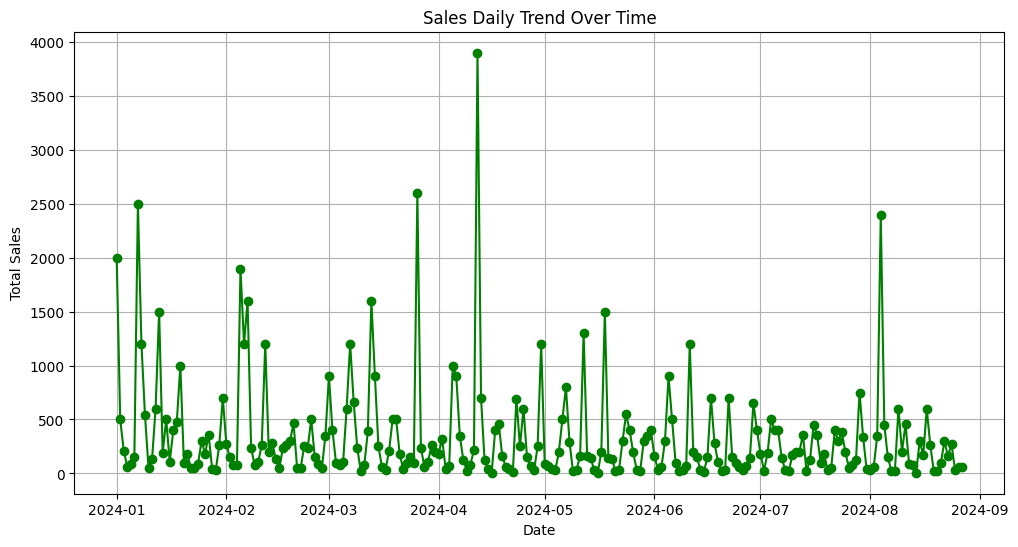

In [ ]:
# Plot the sales trend

sales_trend_daily = sales_data.groupby('Date')['Total Revenue'].sum().reset_index()
sales_trend_daily

plt.figure(figsize=(12, 6))
plt.plot(sales_trend_daily['Date'],sales_trend_daily['Total Revenue'],marker='o',color='green')
plt.title('Sales Daily Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

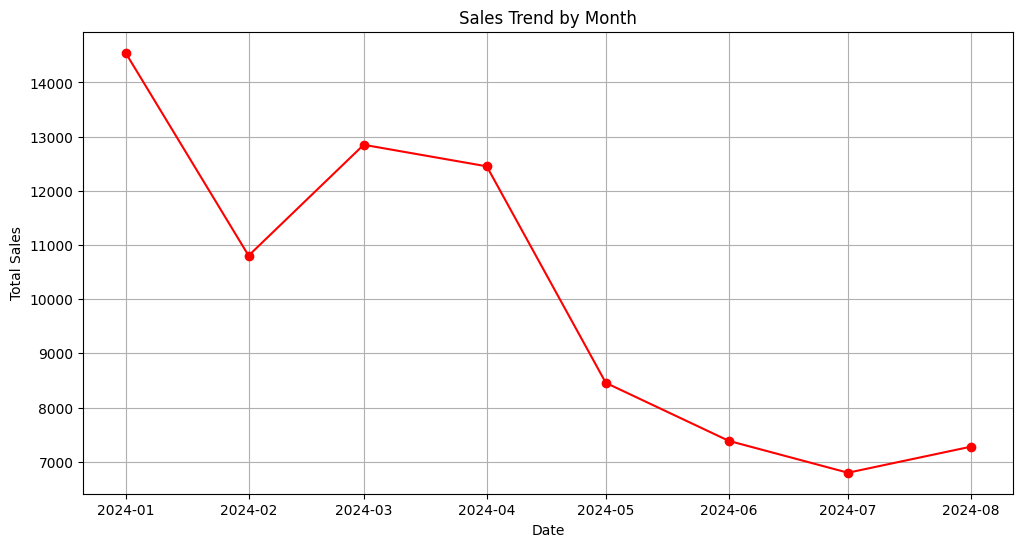

In [ ]:
# Plot the sales trend
sales_trend_monthly = sales_data.groupby('Month')['Total Revenue'].sum().reset_index()



plt.figure(figsize=(12, 6))
plt.plot(sales_trend_monthly['Month'],sales_trend_monthly['Total Revenue'],
         marker='o',color='red')
plt.title('Sales Trend by Month')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


**Analyzing end of week vs rest of the week**

In [ ]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data['DayOfWeek'] = sales_data['Date'].dt.dayofweek
sales_data['IsWeekend'] = sales_data['DayOfWeek'].isin([6,7])
sales_data.head(5)


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Month_Number,Month,Week_Number,Week,DayOfWeek,IsWeekend
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,1,2024-01-01,1,2024-01-01,0,False
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,1,2024-01-01,1,2024-01-01,1,False
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,1,2024-01-01,1,2024-01-01,2,False
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,1,2024-01-01,1,2024-01-01,3,False
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,1,2024-01-01,1,2024-01-01,4,False


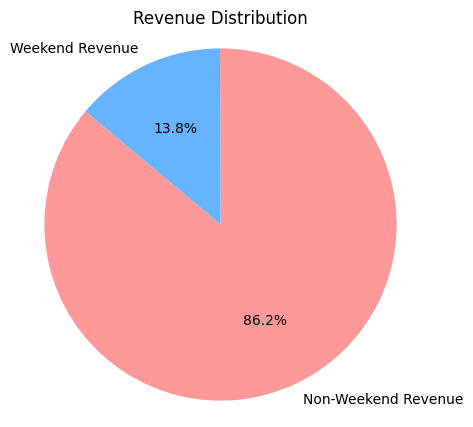

In [ ]:
non_weekend_revenue=sum(sales_data[sales_data["IsWeekend"]==False]['Total Revenue'])
weekend_revenue=sum(sales_data[sales_data["IsWeekend"]==True]['Total Revenue'])
# Create a pie chart
labels = ['Non-Weekend Revenue', 'Weekend Revenue']
sizes = [non_weekend_revenue, weekend_revenue]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.title('Revenue Distribution')
plt.show()

**Finding peaks/drops/anomailes**

by the biggest absolute change

In [ ]:

sales_data = sales_data.sort_values(by='Date')

# Create a new column for the previous day's revenue
sales_data['previous_day_revenue'] = sales_data['Total Revenue'].shift(1)

# Display the updated DataFrame
sales_data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Month_Number,Month,Week_Number,Week,DayOfWeek,IsWeekend,Previous_Date,previous_day_revenue
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,1,2024-01-01,1,2024-01-01,0,False,2023-12-31,NaN
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,1,2024-01-01,1,2024-01-01,1,False,2024-01-01,1999.98
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,1,2024-01-01,1,2024-01-01,2,False,2024-01-02,499.99
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,1,2024-01-01,1,2024-01-01,3,False,2024-01-03,209.97
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,1,2024-01-01,1,2024-01-01,4,False,2024-01-04,63.96


In [ ]:
max_daily_change = sales_data[sales_data["previous_day_revenue"] == sales_data.previous_day_revenue.max()]
max_daily_change

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Month_Number,Month,Week_Number,Week,DayOfWeek,IsWeekend,Previous_Date,previous_day_revenue
103,10104,2024-04-13,Home Appliances,Shark IQ Robot Vacuum,2,349.99,699.98,Europe,PayPal,4,2024-04-01,15,2024-04-08,5,False,2024-04-12,3899.99


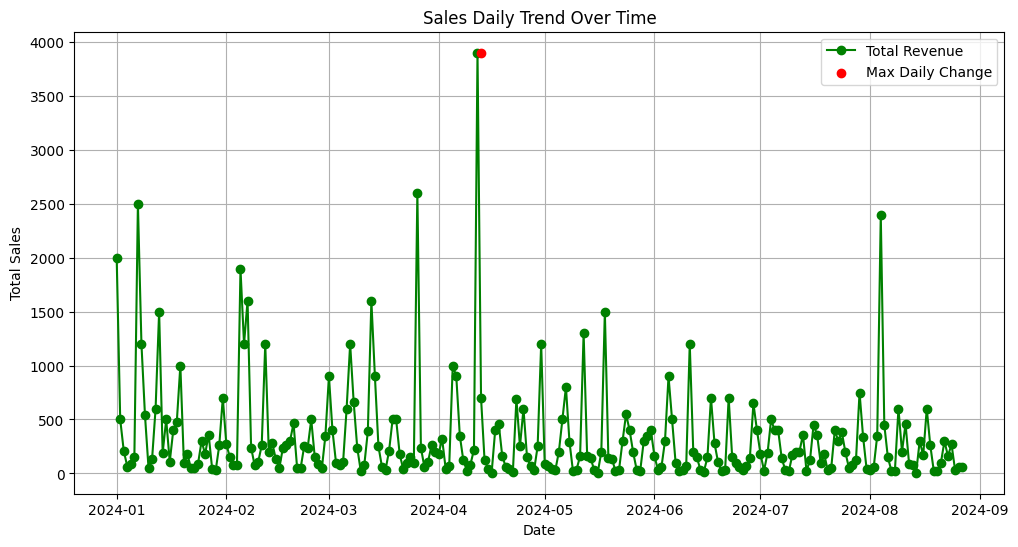

In [ ]:

max_change_revenue = max_daily_change.previous_day_revenue

max_change_date = max_daily_change['Date']

# Plot the sales trend
plt.figure(figsize=(12, 6))
plt.plot(sales_trend_daily['Date'], sales_trend_daily['Total Revenue'], marker='o', color='green', label='Total Revenue')
plt.scatter(max_change_date, max_change_revenue, color='red', label='Max Daily Change', zorder=5)  # Highlight the max daily change point
plt.title('Sales Daily Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()


by the biggest % change

In [ ]:
sales_data["change_percent"]=100*(sales_data["Total Revenue"]-sales_data["previous_day_revenue"])/sales_data["previous_day_revenue"]
sales_data["change_percent"]=abs(sales_data["change_percent"])##absolute value

max_daily_change_percent = sales_data[sales_data["change_percent"] == sales_data.change_percent.max()]
max_daily_change_percent

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Month_Number,Month,Week_Number,Week,DayOfWeek,IsWeekend,Previous_Date,previous_day_revenue,change_%,change_per,change_percent
107,10108,2024-04-17,Sports,Bowflex SelectTech 552 Dumbbells,1,399.99,399.99,Asia,Credit Card,4,2024-04-01,16,2024-04-15,2,False,2024-04-16,6.5,6053.692308,6053.692308,6053.692308


In [ ]:
sales_data[sales_data["Date"]=="2024-04-16"]

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Month_Number,Month,Week_Number,Week,DayOfWeek,IsWeekend,Previous_Date,previous_day_revenue,change_%,change_per,change_percent
106,10107,2024-04-16,Beauty Products,The Ordinary Niacinamide Serum,1,6.5,6.5,Europe,PayPal,4,2024-04-01,16,2024-04-15,1,False,2024-04-15,43.96,-85.213831,85.213831,85.213831


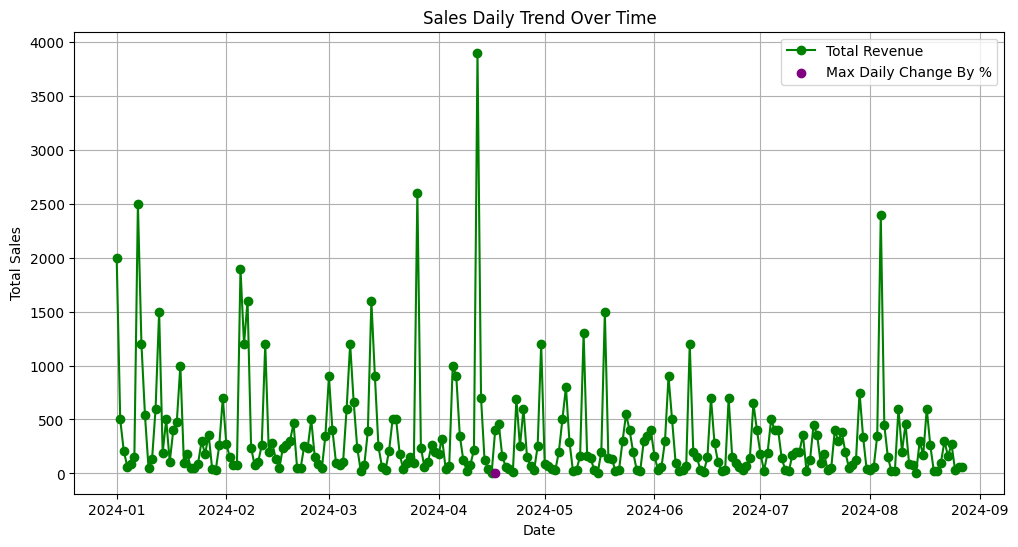

In [ ]:


max_change_revenue = max_daily_change_percent.previous_day_revenue

max_change_date = max_daily_change_percent['Date']

# Plot the sales trend
plt.figure(figsize=(12, 6))
plt.plot(sales_trend_daily['Date'], sales_trend_daily['Total Revenue'], marker='o', color='green', label='Total Revenue')
plt.scatter(max_change_date, max_change_revenue, color='purple', label='Max Daily Change By %', zorder=5)  # Highlight the max daily change point
plt.title('Sales Daily Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()


Explore the revenue of different product categories

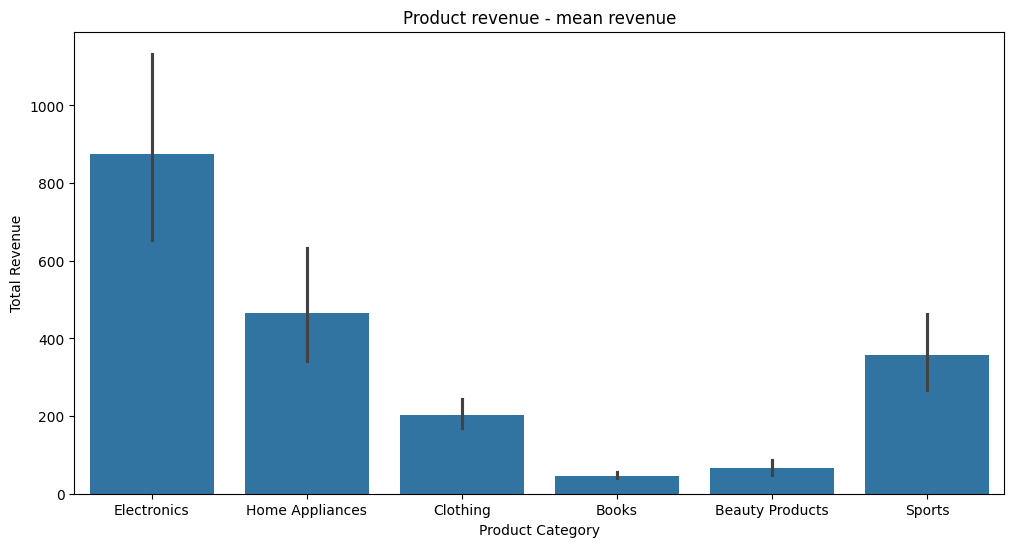

In [ ]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Product Category', y='Total Revenue', data=sales_data)
## avg by deafult
plt.title('Product revenue - mean revenue')

plt.show()

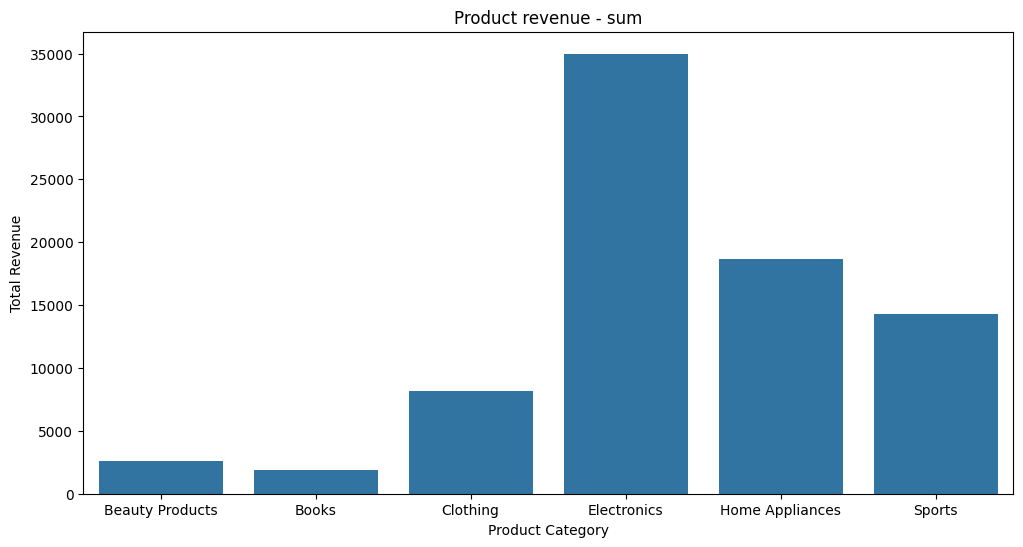

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Product Category' and 'Region' and sum the 'Total Revenue'
grouped_data = sales_data.groupby(['Product Category'], as_index=False)['Total Revenue'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x='Product Category', y='Total Revenue', data=grouped_data)

plt.title('Product revenue - sum')

plt.show()


Explore the revenue of different product categories over time

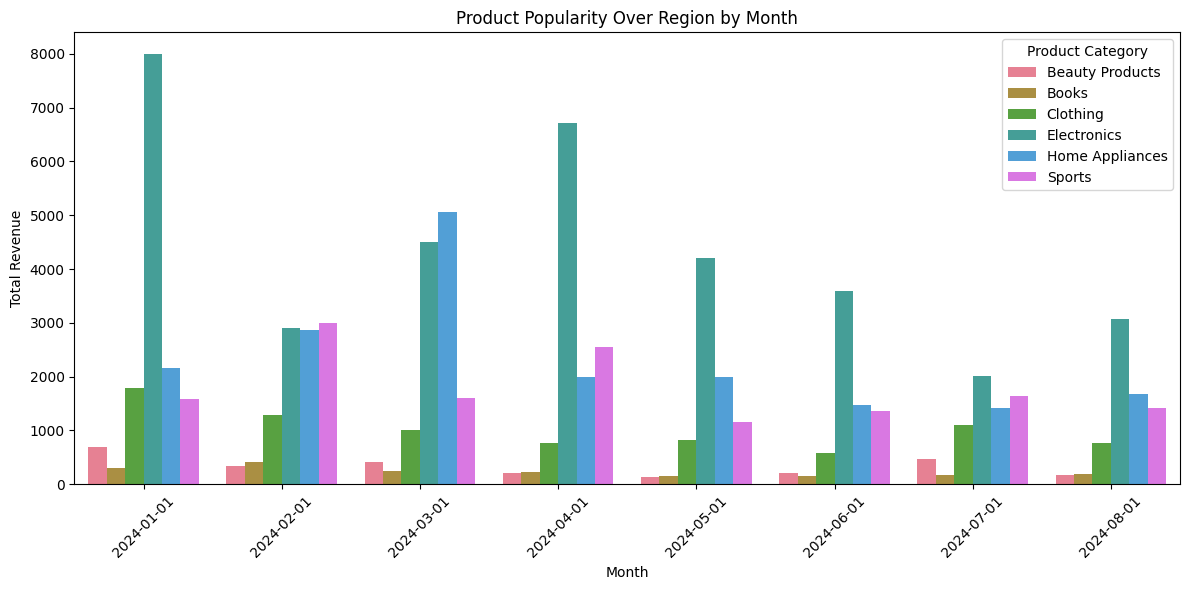

In [ ]:


# Group by 'Product Category' and 'Month' and sum the 'Total Revenue'
grouped_data = sales_data.groupby(['Product Category', 'Month'], as_index=False)['Total Revenue'].sum()

# Define a consistent color palette
unique_categories = grouped_data['Product Category'].unique()
palette = sns.color_palette("husl", len(unique_categories))
category_palette = {category: palette[i] for i, category in enumerate(unique_categories)}

plt.figure(figsize=(12, 6))

# Create a bar plot with 'Month' as hue to show the data over different months
sns.barplot(x='Month', y='Total Revenue', hue='Product Category', data=grouped_data, palette=category_palette)

plt.title('Product Popularity Over Region by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Product Category')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


**Adding Region**

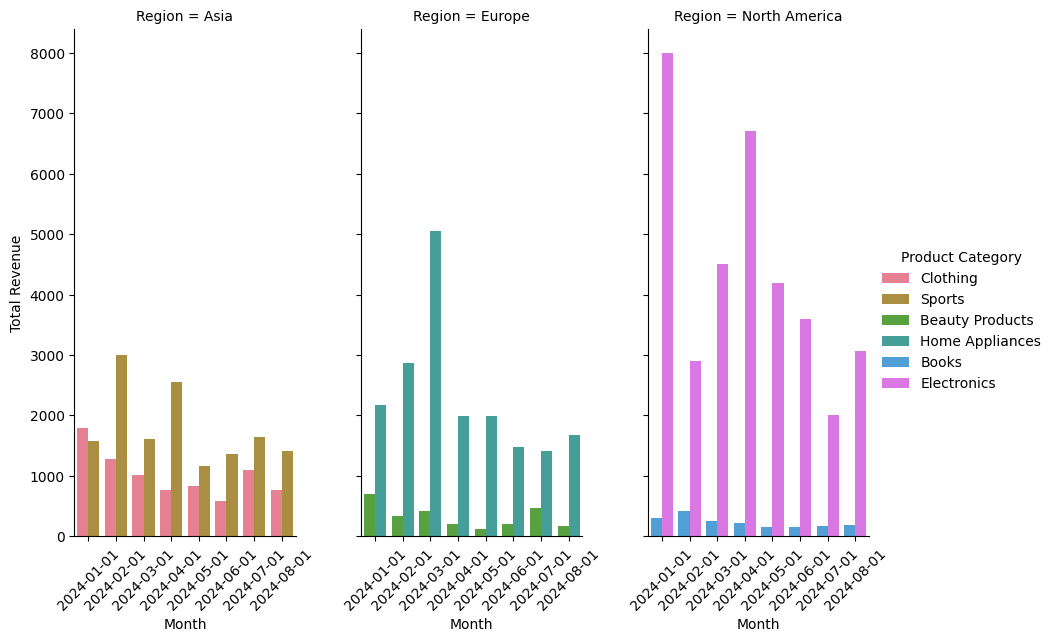

In [ ]:


grouped_data = sales_data.groupby(['Region', 'Product Category', 'Month'], as_index=False)['Total Revenue'].sum()

# Create a FacetGrid with 'Region' as the column
g = sns.FacetGrid(grouped_data, col="Region", height=6, aspect=0.5)
g.map_dataframe(sns.barplot, x="Month", y="Total Revenue", hue="Product Category", palette=category_palette)

# Add a legend and rotate the x-axis labels for better readability
g.add_legend(title='Product Category')
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.show()


**Adding payment method**

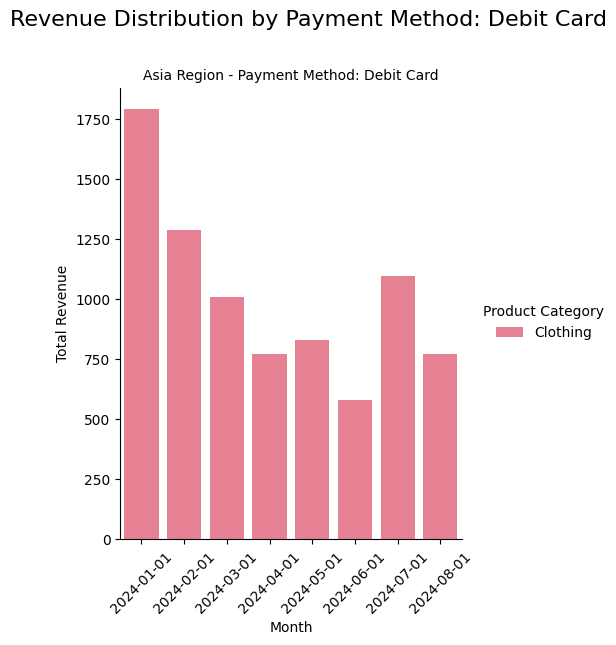

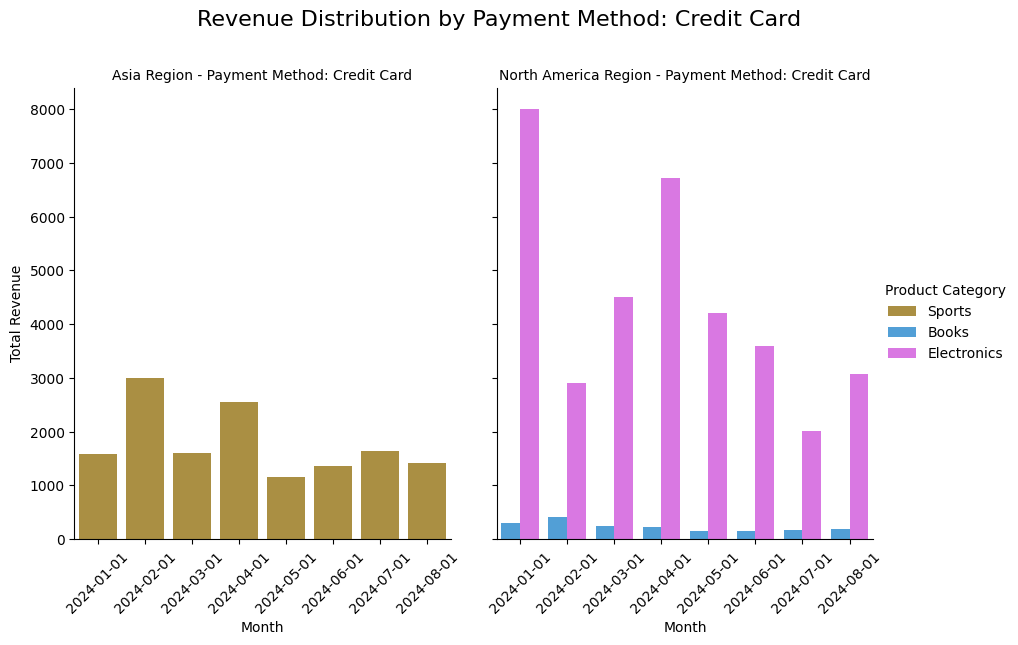

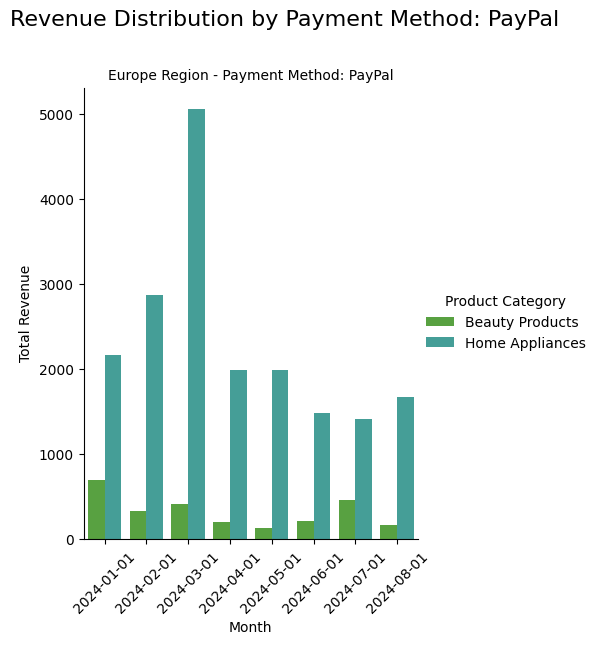

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Region', 'Product Category', 'Month', and 'Payment Method' and sum the 'Total Revenue'
grouped_data = sales_data.groupby(['Region', 'Product Category', 'Month', 'Payment Method'], as_index=False)['Total Revenue'].sum()

# Define a consistent color palette
unique_categories = grouped_data['Product Category'].unique()
palette = sns.color_palette("husl", len(unique_categories))
category_palette = {category: palette[i] for i, category in enumerate(unique_categories)}

# Create a FacetGrid with 'Region' as the column and loop through unique 'Payment Method'
payment_methods = grouped_data['Payment Method'].unique()

for method in payment_methods:
    data_subset = grouped_data[grouped_data['Payment Method'] == method]
    g = sns.FacetGrid(data_subset, col="Region", height=6, aspect=0.75)
    g.map_dataframe(sns.barplot, x="Month", y="Total Revenue", hue="Product Category", palette=category_palette)
    g.add_legend(title='Product Category')

    # Set the title for each grid to indicate the payment method
    g.set_titles(col_template="{col_name} Region - Payment Method: " + method)

    # Rotate the x-axis labels for better readability
    for ax in g.axes.flatten():
        for label in ax.get_xticklabels():
            label.set_rotation(45)

    # Adjust the layout to add space between the plots and avoid overlapping titles
    g.fig.subplots_adjust(top=0.85, hspace=0.4)
    g.fig.suptitle(f'Revenue Distribution by Payment Method: {method}', fontsize=16)

    # Show the plot for each payment method
    plt.show()
